# **New York City Yellow Taxi Data**

# Student Name: Ujwal Abhishek

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings

# Ignore all warnings (not recommended for production debugging)
warnings.filterwarnings("ignore")

# To show warnings again (optional)
# warnings.filterwarnings("default")


In [2]:
# Ensure pyarrow is installed: pip install pyarrow
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.3
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [202]:
# Try loading one file

df = pd.read_parquet('C:/Users/ujwal/OneDrive/Desktop/AI & ML/AI/MLC76/lxp content/SQL and Statistics Essentials/5.EDA Assignment/Starter Notebook - EDA NYC Taxi/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [203]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:/Users/ujwal/OneDrive/Desktop/AI & ML/AI/MLC76/lxp content/SQL and Statistics Essentials/5.EDA Assignment/Starter Notebook - EDA NYC Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current month file
        month_df = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        
        # Ensure pickup datetime is in datetime format
        month_df['tpep_pickup_datetime'] = pd.to_datetime(month_df['tpep_pickup_datetime'])

        # Extract date and hour
        month_df['pickup_date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['pickup_hour'] = month_df['tpep_pickup_datetime'].dt.hour
        # Loop through dates and then loop through every hour of each date
        for date in month_df['pickup_date'].unique():
            date_data = month_df[month_df['pickup_date'] == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['pickup_hour'] == hour]
                # Sample 5% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
# Final shape of combined sampled data
print("Sampling complete. Final data shape:", df.shape)

Error reading file sampled.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Sampling complete. Final data shape: (2042850, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
print(df.to_csv('C:/Users/ujwal/OneDrive/Desktop/AI & ML/AI/MLC76/lxp content/SQL and Statistics Essentials/5.EDA Assignment/Starter Notebook - EDA NYC Taxi/sampledata.csv',','))

None


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [75]:
# Load the new data file
sampleData= pd.read_csv('C:/Users/ujwal/OneDrive/Desktop/AI & ML/AI/MLC76/lxp content/SQL and Statistics Essentials/5.EDA Assignment/Starter Notebook - EDA NYC Taxi/sampledata.csv')

In [76]:
sampleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042850 entries, 0 to 2042849
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  pickup_date            object 
 21  pickup_hour            int64  
 22  Airport_fee       

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [77]:
sampleData.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [78]:
# Fix the index and drop any columns that are not needed
sampleData.reset_index(drop=True, inplace=True)

unnamed_cols = [col for col in sampleData.columns if 'unnamed' in col.lower()]
sampleData.drop(columns=unnamed_cols, inplace=True)
sampleData

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042845,2,2023-09-30 23:46:34,2023-09-30 23:53:20,1.0,0.79,1.0,N,231,231,1,...,0.5,2.00,0.0,1.0,15.60,2.5,NaN,2023-09-30,23,0.0
2042846,1,2023-09-30 23:44:51,2023-09-30 23:49:05,3.0,0.50,1.0,N,158,68,1,...,0.5,2.15,0.0,1.0,12.95,2.5,NaN,2023-09-30,23,0.0
2042847,2,2023-09-30 23:11:05,2023-09-30 23:18:42,1.0,1.09,1.0,N,161,162,1,...,0.5,2.86,0.0,1.0,17.16,2.5,NaN,2023-09-30,23,0.0
2042848,1,2023-09-30 23:26:31,2023-10-01 00:04:05,2.0,13.20,1.0,N,164,14,2,...,0.5,0.00,0.0,1.0,59.80,2.5,NaN,2023-09-30,23,0.0


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [79]:
# Combine the two airport fee columns
# Merge the two airport fee columns by preferring non-null values
sampleData['airport_fee'] = sampleData['airport_fee'].combine_first(sampleData['Airport_fee'])

# Drop the redundant column
sampleData.drop(columns=['Airport_fee'], inplace=True)

sampleData

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,0,...,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042845,2,2023-09-30 23:46:34,2023-09-30 23:53:20,1.0,0.79,1.0,N,231,231,1,...,1.0,0.5,2.00,0.0,1.0,15.60,2.5,0.00,2023-09-30,23
2042846,1,2023-09-30 23:44:51,2023-09-30 23:49:05,3.0,0.50,1.0,N,158,68,1,...,3.5,0.5,2.15,0.0,1.0,12.95,2.5,0.00,2023-09-30,23
2042847,2,2023-09-30 23:11:05,2023-09-30 23:18:42,1.0,1.09,1.0,N,161,162,1,...,1.0,0.5,2.86,0.0,1.0,17.16,2.5,0.00,2023-09-30,23
2042848,1,2023-09-30 23:26:31,2023-10-01 00:04:05,2.0,13.20,1.0,N,164,14,2,...,3.5,0.5,0.00,0.0,1.0,59.80,2.5,0.00,2023-09-30,23


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [80]:
# check where values of fare amount are negative

negative_fare_rows = sampleData[sampleData['fare_amount'] < 0]
print(f"Number of rows with negative fare_amount: {len(negative_fare_rows)}")

Number of rows with negative fare_amount: 0


Did you notice something different in the `RatecodeID` column for above records?

In [81]:
# Step 2: Analyze RatecodeID for those negative fare_amount rows
ratecode_analysis = negative_fare_rows['RatecodeID'].value_counts(dropna=False)
print("RatecodeID distribution for negative fare_amounts:\n", ratecode_analysis)

RatecodeID distribution for negative fare_amounts:
 Series([], Name: count, dtype: int64)


In [82]:
# Find which columns have negative values

# Step 3: Identify monetary columns with negative values
monetary_columns = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'
]

negative_monetary_columns = [col for col in monetary_columns if (sampleData[col] < 0).any()]
print("Columns with negative values:", negative_monetary_columns)

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [83]:
# fix these negative values

sampleData[negative_monetary_columns] = sampleData[negative_monetary_columns].clip(lower=0)

# verify again for columns with -ve values 
negative_monetary_columns = [col for col in monetary_columns if (sampleData[col] < 0).any()]
print("Columns with negative values:", negative_monetary_columns)

Columns with negative values: []


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [84]:
# Find the proportion of missing values in each column

# Calculate proportion of missing (NaN) values in each column
missing_proportion = sampleData.isnull().mean().sort_values(ascending=False)
# Display result as percentages
missing_proportion_percent = (missing_proportion * 100).round(2)
print(missing_proportion_percent)

passenger_count          3.44
airport_fee              3.44
congestion_surcharge     3.44
store_and_fwd_flag       3.44
RatecodeID               3.44
trip_distance            0.00
tpep_dropoff_datetime    0.00
tpep_pickup_datetime     0.00
VendorID                 0.00
payment_type             0.00
fare_amount              0.00
PULocationID             0.00
DOLocationID             0.00
mta_tax                  0.00
extra                    0.00
tip_amount               0.00
tolls_amount             0.00
total_amount             0.00
improvement_surcharge    0.00
pickup_date              0.00
pickup_hour              0.00
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [85]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

# Display no of rows where 'passenger_count' is null
null_passengers = sampleData['passenger_count'].isnull().sum()
print(f"Records with passenger_count zero: {null_passengers}")

Records with passenger_count zero: 70245


In [86]:
# Compute mode (most common passenger count)
most_common = sampleData['passenger_count'].mode()[0]
most_common

np.float64(1.0)

In [87]:
# Fill missing values
sampleData['passenger_count'].fillna(most_common, inplace=True)
print("Missing passenger_count after imputation:", sampleData['passenger_count'].isnull().sum())

Missing passenger_count after imputation: 0


In [88]:

# Count rows where passenger_count is 0
zero_passengers = sampleData[sampleData['passenger_count'] == 0]
print(f"Records with passenger_count zero: {len(zero_passengers)}")


Records with passenger_count zero: 31420


Did you find zeroes in passenger_count? Handle these.

In [89]:
# Drop those rows
sampleData = sampleData[sampleData['passenger_count'] != 0]

# verify again records with passenger_count = 0   
zero_passengers = sampleData[sampleData['passenger_count'] == 0]
print(f"Records with passenger_count zero: {len(zero_passengers)}")

Records with passenger_count zero: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [90]:
# Fix missing values in 'RatecodeID'

In [91]:
#Check how many are missing
missing_count = sampleData['RatecodeID'].isnull().sum()
print(f"Missing RatecodeID count: {missing_count}")

Missing RatecodeID count: 70245


In [92]:
# Find most frequent RatecodeID
most_common_ratecode = sampleData['RatecodeID'].mode()[0]

# Fill missing values
sampleData['RatecodeID'].fillna(most_common_ratecode, inplace=True)
#Check how many are missing
missing_count = sampleData['RatecodeID'].isnull().sum()
print(f"Missing RatecodeID count after imputation: {missing_count}")

Missing RatecodeID count after imputation: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [93]:
# handle null values in congestion_surcharge
#Check how many are missing
congestion_surcharge_missing_count = sampleData['congestion_surcharge'].isnull().sum()
print(f"Missing RatecodeID count: {congestion_surcharge_missing_count}")

Missing RatecodeID count: 70245


In [94]:
# Find most frequent RatecodeID
most_common_congestion_surcharge = sampleData['congestion_surcharge'].mode()[0]

# Fill missing values
sampleData['congestion_surcharge'].fillna(most_common_congestion_surcharge, inplace=True)
#Check how many are missing
congestion_surcharge_missing_count = sampleData['congestion_surcharge'].isnull().sum()
print(f"Missing RatecodeID count after imputation: {congestion_surcharge_missing_count}")

Missing RatecodeID count after imputation: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [95]:
# Handle any remaining missing values

missing_summary = sampleData.isnull().sum()
missing_columns = missing_summary[missing_summary > 0]
print(f"These are columns with null values: \n{missing_columns}")

These are columns with null values: 
store_and_fwd_flag    70245
airport_fee           70245
dtype: int64


In [96]:
#most common vaue in column store_and_fwd_flag
most_common_store_and_fwd_flag = sampleData['store_and_fwd_flag'].mode()[0]
# Fill missing values with 'N'
sampleData['store_and_fwd_flag'].fillna(most_common_store_and_fwd_flag, inplace=True)

#Check again after immutation
store_and_fwd_flag_missing_count = sampleData['store_and_fwd_flag'].isnull().sum()
print(f"Missing store_and_fwd_flag count after imputation: {store_and_fwd_flag_missing_count}")


Missing store_and_fwd_flag count after imputation: 0


In [97]:
# Fill missing values with '0' for airport_fee
sampleData['airport_fee'].fillna(0, inplace=True)

#Check again after immutation
airport_fee_missing_count = sampleData['airport_fee'].isnull().sum()
print(f"Missing airport_fee count after imputation: {airport_fee_missing_count}")

Missing airport_fee count after imputation: 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [98]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Basic statistics for numerical columns
sampleData.describe().round(2)


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour
count,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00,2011430.00
mean,1.75,1.38,3.90,1.59,164.54,163.57,1.16,20.09,1.57,0.50,3.58,0.60,1.00,29.21,2.31,0.14,14.89
std,0.44,0.87,125.66,7.12,63.90,70.11,0.51,102.59,1.81,0.05,4.08,2.19,0.03,103.50,0.66,0.47,6.04
min,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.06,1.00,132.00,113.00,1.00,9.30,0.00,0.50,1.00,0.00,1.00,16.00,2.50,0.00,11.00
50%,2.00,1.00,1.81,1.00,161.00,162.00,1.00,13.50,1.00,0.50,2.86,0.00,1.00,21.30,2.50,0.00,16.00
75%,2.00,1.00,3.50,1.00,233.00,234.00,1.00,22.60,2.50,0.50,4.48,0.00,1.00,31.20,2.50,0.00,20.00
max,6.00,9.00,126360.46,99.00,265.00,265.00,4.00,143163.45,20.80,4.00,223.08,143.00,1.00,143167.45,2.50,1.75,23.00


In [99]:
# List of numerical columns
numerical_cols = sampleData.select_dtypes(include=['number']).columns

# Display min and max for each column
sampleData[numerical_cols].agg(['min', 'max'])


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour
min,1,1.0,0.00,1.0,1,1,0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0
max,6,9.0,126360.46,99.0,265,265,4,143163.45,20.8,4.0,223.08,143.0,1.0,143167.45,2.5,1.75,23


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

#### Remove passenger_count > 6

In [100]:
# remove passenger_count > 6
sampleData = sampleData[sampleData['passenger_count'] <= 6]
print("Max passenger_count after cleanup:", sampleData['passenger_count'].max())

Max passenger_count after cleanup: 6.0


#### Entries where trip_distance is nearly 0 and fare_amount is more than 300

In [101]:
# Continue with outlier handling

suspicious_entries = sampleData[(sampleData['trip_distance'] <= 0) & (sampleData['fare_amount'] > 300)].shape[0]

# Display  entries
print(f"No of rows with entries where trip_distance is nearly 0 and fare_amount is more than 300: {suspicious_entries}")

No of rows with entries where trip_distance is nearly 0 and fare_amount is more than 300: 32


In [102]:
# Dropping entries where trip_distance is nearly 0 and fare_amount is more than 300 
sampleData = sampleData[~((sampleData['trip_distance'] < 0) & (sampleData['fare_amount'] > 300))]
# Verify that no such rows remain
remaining = sampleData[(sampleData['trip_distance'] < 0) & (sampleData['fare_amount'] > 300)]
print(f"Remaining suspicious rows after cleanup: {len(remaining)}")  # Should be 0

Remaining suspicious rows after cleanup: 0


#### Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)

In [103]:

# Filter for invalid records
invalid_zero_fare_distance = sampleData[
    (sampleData['trip_distance'] == 0) &
    (sampleData['fare_amount'] == 0) &
    (sampleData['PULocationID'] != sampleData['DOLocationID'])
]

# Display count
print(f"Invalid records found: {len(invalid_zero_fare_distance)}")

Invalid records found: 61


In [104]:
# drop entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 
sampleData = sampleData[~((sampleData['trip_distance'] == 0) &
    (sampleData['fare_amount'] == 0) &
    (sampleData['PULocationID'] != sampleData['DOLocationID']))]

# Verify that no such rows remain
invalid_zero_fare_distance = sampleData[
    (sampleData['trip_distance'] == 0) &
    (sampleData['fare_amount'] == 0) &
    (sampleData['PULocationID'] != sampleData['DOLocationID'])
]

print(f"Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different after cleanup: {len(invalid_zero_fare_distance)}")

Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different after cleanup: 0


#### Filter entries where trip_distance exceeds 250 miles


In [105]:
# Filter entries where trip_distance exceeds 250 miles
long_distance_trips = sampleData[sampleData['trip_distance'] > 250]

print(f"Number of entries with trip_distance > 250 miles after cleanup: {len(long_distance_trips)}")


Number of entries with trip_distance > 250 miles after cleanup: 46


In [106]:
# Drop entries where trip_distance exceeds 250 miles
sampleData = sampleData.drop(index = sampleData.query('trip_distance > 250').index)

long_distance_trips = sampleData[sampleData['trip_distance'] > 250]

# Display count and optionally show first few records
print(f"Number of entries with trip_distance > 250 miles after cleanup: {len(long_distance_trips)}")

Number of entries with trip_distance > 250 miles after cleanup: 0


#### Entries where payment_type is 0 

In [107]:
#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
# Find entries with invalid payment_type = 0
invalid_payment_type = sampleData[sampleData['payment_type'] == 0]
print(f"Number of entries with payment_type = 0 after cleanup: {len(invalid_payment_type)}")


Number of entries with payment_type = 0 after cleanup: 70215


In [108]:
# Remove Entries where payment_type is 0 
sampleData = sampleData[sampleData['payment_type'] != 0]

invalid_payment_type = sampleData[sampleData['payment_type'] == 0]
print(f"Number of entries with payment_type = 0 after cleanup: {len(invalid_payment_type)}")

Number of entries with payment_type = 0 after cleanup: 0


#### RateCodeID col for values not in 1 - 6

In [109]:
#RatecodeID is a catagorical data as per data dictonary values can be one of 1= Standard rate,2=JFK,3=Newark,4=Nassau or Westchester,5=Negotiated fare,6=Group ride

#checking RateCodeID col for values not in 1 - 6
sampleData.query("RatecodeID < 1 or RatecodeID > 6")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour
372,1,2023-01-01 01:51:10,2023-01-01 02:19:45,1.0,0.0,99.0,N,74,77,1,...,0.0,0.5,0.0,6.55,1.0,49.25,0.0,0.0,2023-01-01,1
669,1,2023-01-01 02:30:32,2023-01-01 03:05:47,1.0,10.1,99.0,N,28,86,1,...,0.0,0.5,0.0,0.00,1.0,38.00,0.0,0.0,2023-01-01,2
1441,1,2023-01-01 10:11:12,2023-01-01 10:29:27,1.0,0.0,99.0,N,35,77,1,...,0.0,0.5,0.0,0.00,1.0,15.50,0.0,0.0,2023-01-01,10
1558,1,2023-01-01 11:39:40,2023-01-01 11:55:59,1.0,2.9,99.0,N,42,47,1,...,0.0,0.5,0.0,0.00,1.0,24.00,0.0,0.0,2023-01-01,11
1823,1,2023-01-01 12:55:17,2023-01-01 13:17:08,1.0,2.6,99.0,N,41,167,1,...,0.0,0.5,0.0,0.00,1.0,22.00,0.0,0.0,2023-01-01,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039116,1,2023-09-30 12:21:00,2023-09-30 13:01:31,1.0,0.9,99.0,N,37,182,1,...,0.0,0.5,0.0,0.00,1.0,48.00,0.0,0.0,2023-09-30,12
2039324,1,2023-09-30 13:55:58,2023-09-30 14:20:03,1.0,1.9,99.0,N,232,158,1,...,0.0,0.5,0.0,0.00,1.0,20.00,0.0,0.0,2023-09-30,13
2039469,1,2023-09-30 13:52:38,2023-09-30 14:14:49,1.0,2.8,99.0,N,127,116,1,...,0.0,0.5,0.0,0.00,1.0,22.00,0.0,0.0,2023-09-30,13
2039483,1,2023-09-30 13:10:13,2023-09-30 14:09:53,1.0,16.8,99.0,N,205,247,1,...,0.0,0.5,0.0,6.94,1.0,58.94,0.0,0.0,2023-09-30,13


In [110]:
#before deciding whether to drop the above rows or impute the values for RatecodeID for incorrect values lets check out of 10649 records 
#how many records are there where trip distance is 0 
sampleData.query("(RatecodeID < 1 or RatecodeID > 6) and trip_distance <=0").shape[0]

1182

In [111]:
#since we observe only 1182 rows out of 10649 where trip_distance <=0 and larger set of records have trip_distance > 0 
# so we drop 1182 rows where  trip_distance <=0
sampleData = sampleData.drop(index = sampleData.query("(RatecodeID < 1 or RatecodeID > 6) and trip_distance <=0").index)

In [112]:
# and impute the RatecodeID column for these records with most common values 
# Find most frequent RatecodeID
most_common_ratecode = sampleData['RatecodeID'].mode()[0]
sampleData.loc[sampleData.query("RatecodeID < 1 or RatecodeID > 6").index, 'RatecodeID'] = 1
sampleData.query("RatecodeID < 1 or RatecodeID > 6").shape[0]

0

#### airport_fee

In [113]:
#airport_fee value as per data dictionary is 1.25 we see  max value is 1.75 so there are outliers lets plot a box plot to observe 
sampleData.airport_fee.describe().round(2)

count    1939905.00
mean           0.15
std            0.48
min            0.00
25%            0.00
50%            0.00
75%            0.00
max            1.75
Name: airport_fee, dtype: float64

In [114]:
# so only 0 to 1.25 are valid entries as per data dictionary
sampleData.query("airport_fee > 1.25")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour
156198,2,2023-10-01 00:42:02,2023-10-01 01:03:42,1.0,11.63,1.0,N,132,160,1,...,1.0,0.5,9.78,0.00,1.0,60.43,0.0,1.75,2023-10-01,0
156301,2,2023-10-01 00:21:52,2023-10-01 01:05:34,1.0,20.36,1.0,N,132,181,1,...,1.0,0.5,16.00,0.00,1.0,102.35,0.0,1.75,2023-10-01,0
156324,2,2023-10-01 00:47:19,2023-10-01 01:31:03,1.0,12.03,1.0,N,132,129,2,...,1.0,0.5,0.00,0.00,1.0,63.95,0.0,1.75,2023-10-01,0
156345,2,2023-10-01 00:47:36,2023-10-01 01:21:19,1.0,10.88,1.0,N,132,82,1,...,1.0,0.5,10.97,0.00,1.0,65.82,0.0,1.75,2023-10-01,0
156354,2,2023-10-01 00:09:13,2023-10-01 00:24:59,1.0,8.62,1.0,N,138,263,1,...,6.0,0.5,10.29,6.94,1.0,63.48,2.5,1.75,2023-10-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042758,2,2023-09-30 23:35:41,2023-10-01 00:12:54,1.0,13.84,1.0,N,132,61,1,...,1.0,0.5,12.16,0.00,1.0,74.71,0.0,1.75,2023-09-30,23
2042784,2,2023-09-30 23:33:30,2023-09-30 23:45:06,1.0,6.32,1.0,N,132,63,2,...,1.0,0.5,0.00,0.00,1.0,28.95,0.0,1.75,2023-09-30,23
2042814,2,2023-09-30 23:43:17,2023-10-01 00:28:17,1.0,14.90,1.0,N,132,226,1,...,1.0,0.5,14.33,0.00,1.0,85.98,0.0,1.75,2023-09-30,23
2042830,2,2023-09-30 23:15:08,2023-09-30 23:37:49,1.0,8.25,1.0,N,132,95,1,...,1.0,0.5,7.54,0.00,1.0,46.99,0.0,1.75,2023-09-30,23


#### checking outliers in fare_amount with box plot

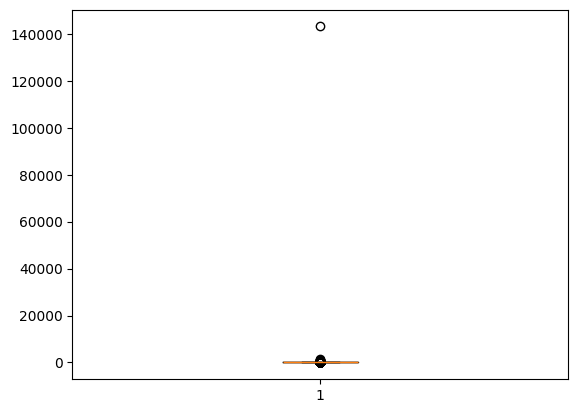

In [115]:
plt.boxplot(sampleData.fare_amount)
plt.show()

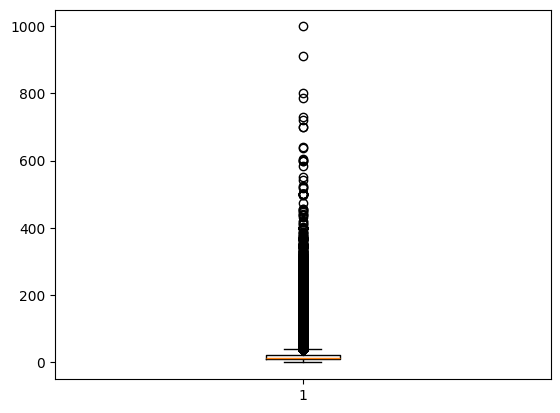

In [116]:
#cleaning out outliers
sampleData = sampleData[~(sampleData['fare_amount'] > 1000)]
plt.boxplot(sampleData.fare_amount)
plt.show()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [117]:
sampleData.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical 
* `tpep_dropoff_datetime`: Categorical 
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`: Categorical 
* `PULocationID`:Categorical 
* `DOLocationID`:Categorical 
* `payment_type`:Categorical 
* `pickup_hour`:Categorical 
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`:Numerical
* `extra`:Numerical
* `mta_tax`:Numerical
* `tip_amount`:Numerical
* `tolls_amount`:Numerical
* `improvement_surcharge`:Numerical
* `total_amount`:Numerical
* `congestion_surcharge`:Numerical
* `airport_fee`:Numerical
* 

##### Temporal Analysis

In [118]:
sampleData.describe().round(3)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour
count,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000,1939903.000
mean,1.751,1.395,3.517,1.076,164.736,163.872,1.203,19.922,1.625,0.495,3.613,0.598,0.999,29.110,2.303,0.150,14.922
std,0.433,0.883,4.600,0.397,63.546,70.039,0.465,18.492,1.816,0.048,4.094,2.182,0.024,23.098,0.673,0.475,6.010
min,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,1.000,1.070,1.000,132.000,113.000,1.000,9.300,0.000,0.500,1.000,0.000,1.000,15.960,2.500,0.000,11.000
50%,2.000,1.000,1.800,1.000,161.000,162.000,1.000,13.500,1.000,0.500,2.880,0.000,1.000,21.000,2.500,0.000,16.000
75%,2.000,1.000,3.480,1.000,233.000,234.000,1.000,21.900,2.500,0.500,4.480,0.000,1.000,31.080,2.500,0.000,20.000
max,2.000,6.000,204.100,6.000,265.000,265.000,4.000,999.000,14.250,4.000,223.080,143.000,1.000,1000.000,2.500,1.750,23.000


**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

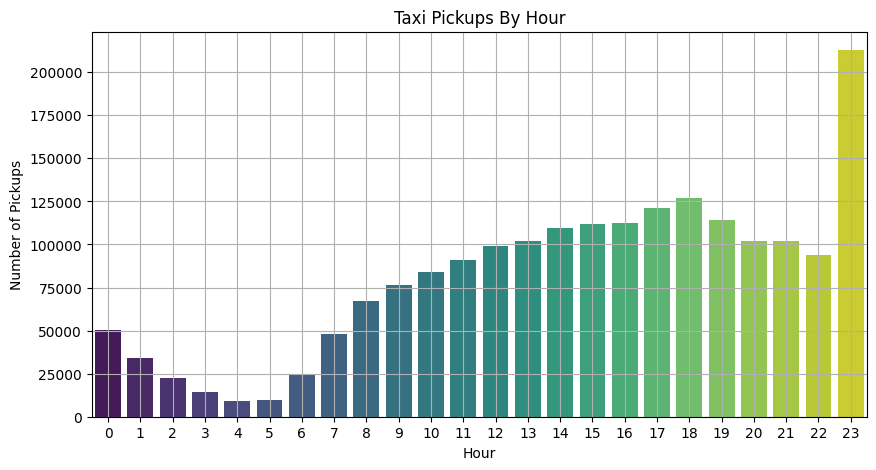

In [119]:
# Find and show the hourly trends in taxi pickups
sampleData['tpep_pickup_datetime'] = pd.to_datetime(sampleData['tpep_pickup_datetime'])
sampleData['pickup_hour'] = sampleData['tpep_pickup_datetime'].dt.hour

plt.figure(figsize=(10, 5))
sns.countplot(data=sampleData, x='pickup_hour', palette='viridis')
plt.title('Taxi Pickups By Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

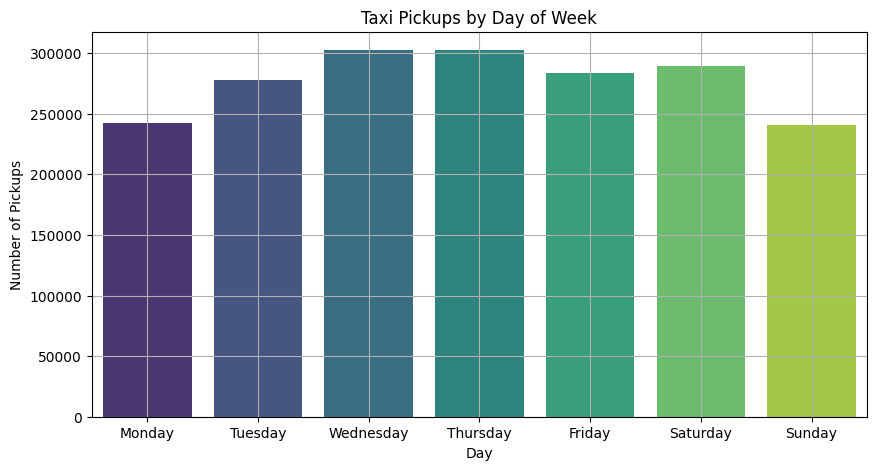

In [120]:
# Find and show the daily trends in taxi pickups (days of the week)

sampleData['pickup_dayofweek'] = sampleData['tpep_pickup_datetime'].dt.dayofweek   # 0 = Monday
sampleData['pickup_dayname'] = sampleData['tpep_pickup_datetime'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.countplot(data=sampleData, x='pickup_dayname', order=day_order, palette='viridis')
plt.title('Taxi Pickups by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()



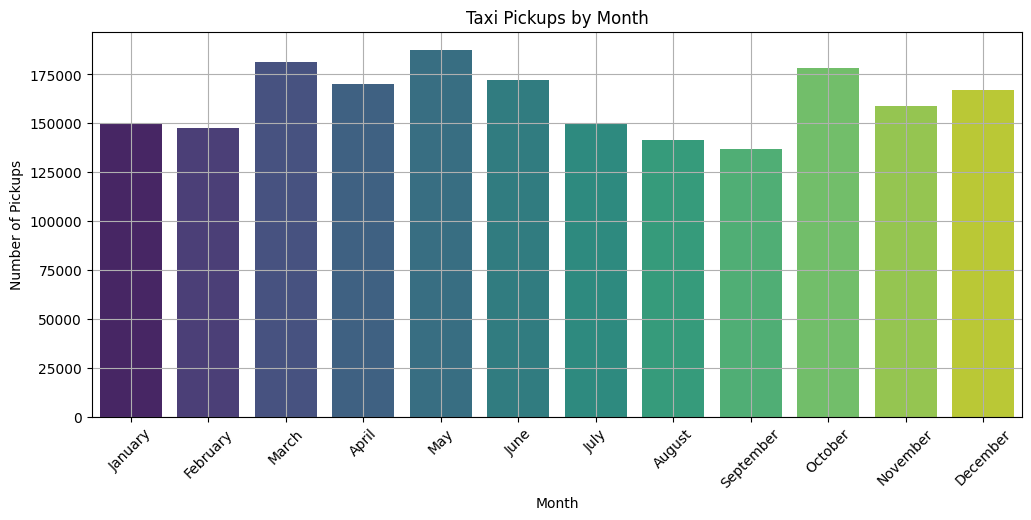

In [121]:
# Show the monthly trends in pickups
sampleData['pickup_month'] = sampleData['tpep_pickup_datetime'].dt.month
sampleData['pickup_monthname'] = sampleData['tpep_pickup_datetime'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 5))
sns.countplot(data=sampleData, x='pickup_monthname', order=month_order, palette='viridis')
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [122]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in columns_to_check:
    zero_count = (sampleData[col] == 0).sum()
    negative_count = (sampleData[col] < 0).sum()
    print(f"{col} [ Zero values: {zero_count}, Negative values: {negative_count}]")

fare_amount [ Zero values: 567, Negative values: 0]
tip_amount [ Zero values: 429894, Negative values: 0]
total_amount [ Zero values: 321, Negative values: 0]
trip_distance [ Zero values: 22592, Negative values: 0]


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [123]:
# Create a df with non zero entries for the selected parameters.

# trip_distance Should never be 0 unless pickup and dropoff are identical Remove if distance = 0 and locations differ 
invalid_trips = sampleData.query('trip_distance == 0 and (PULocationID != DOLocationID)')
print(f"Number of entries with trip_distance = 0 miles &  pickup and dropoff are not identical: {len(invalid_trips)}")

Number of entries with trip_distance = 0 miles &  pickup and dropoff are not identical: 6835


In [124]:
sampleData = sampleData.drop(index=invalid_trips.index)
invalid_trips = sampleData.query('trip_distance == 0 and (PULocationID != DOLocationID)')
print(f"Number of entries with trip_distance = 0 miles &  pickup and dropoff are not identical after cleanup: {len(invalid_trips)}")

Number of entries with trip_distance = 0 miles &  pickup and dropoff are not identical after cleanup: 0


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

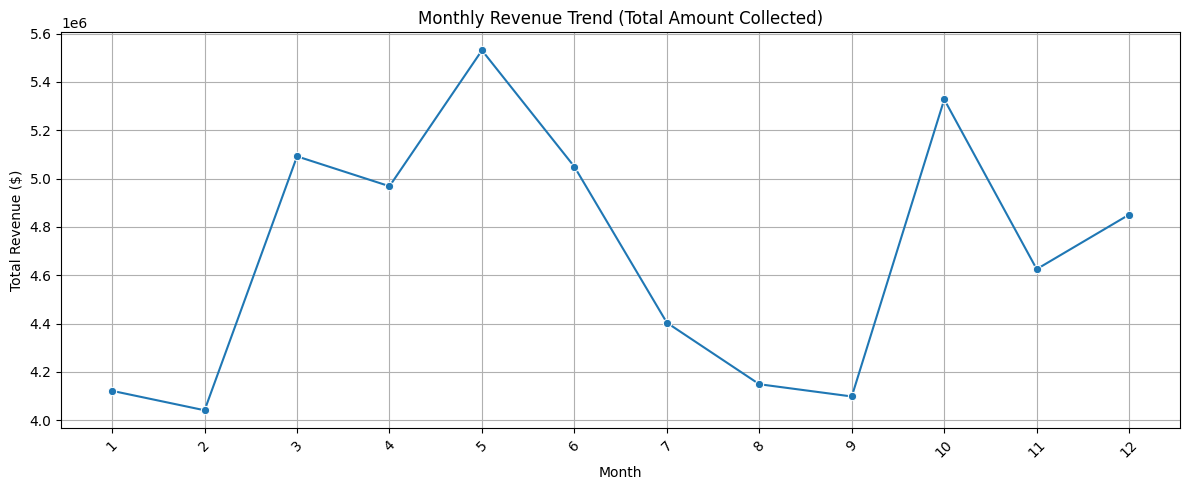

In [125]:
# Group data by month and analyse monthly revenue
monthly_revenue = sampleData.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].astype(str)  # For better plotting

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_revenue, x='pickup_month', y='total_amount', marker='o')
plt.title('Monthly Revenue Trend (Total Amount Collected)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [126]:
# Calculate proportion of each quarter
sampleData['pickup_quarter'] = sampleData['tpep_pickup_datetime'].dt.to_period('Q')

quarterly_revenue = sampleData.groupby('pickup_quarter')['total_amount'].sum().reset_index()
quarterly_revenue['pickup_quarter'] = quarterly_revenue['pickup_quarter'].astype(str)

total_yearly_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_yearly_revenue

quarterly_revenue['proportion_percent'] = (quarterly_revenue['proportion'] * 100).round(2)

print(quarterly_revenue)

  pickup_quarter  total_amount  proportion  proportion_percent
0         2022Q4        243.00    0.000004                0.00
1         2023Q1   13255154.41    0.235616               23.56
2         2023Q2   15547488.43    0.276363               27.64
3         2023Q3   12651443.21    0.224885               22.49
4         2023Q4   14803100.16    0.263131               26.31


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

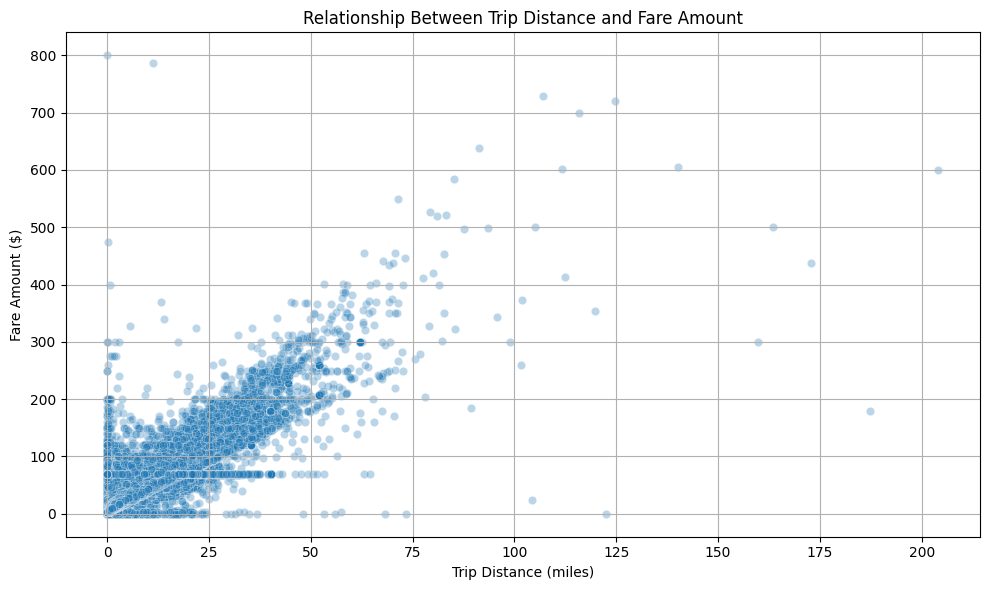

In [127]:
# Show how trip fare is affected by distance
sampleDatatripfare = sampleData.query('trip_distance > 0')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampleDatatripfare, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [128]:
#Compute trip_duration in minutes
sampleData['tpep_pickup_datetime'] = pd.to_datetime(sampleData['tpep_pickup_datetime'])
sampleData['tpep_dropoff_datetime'] = pd.to_datetime(sampleData['tpep_dropoff_datetime'])

sampleData['trip_duration'] = (sampleData['tpep_dropoff_datetime'] - sampleData['tpep_pickup_datetime']).dt.total_seconds() / 60
#Drop rows with negative or zero durations
valid_df = sampleData[(sampleData['trip_duration'] > 0) & (sampleData['trip_duration'] < 200)]

#Check trip_duration outliers 
valid_df.trip_duration.describe().round()

count    1931179.0
mean          16.0
std           13.0
min            0.0
25%            8.0
50%           13.0
75%           20.0
max          200.0
Name: trip_duration, dtype: float64

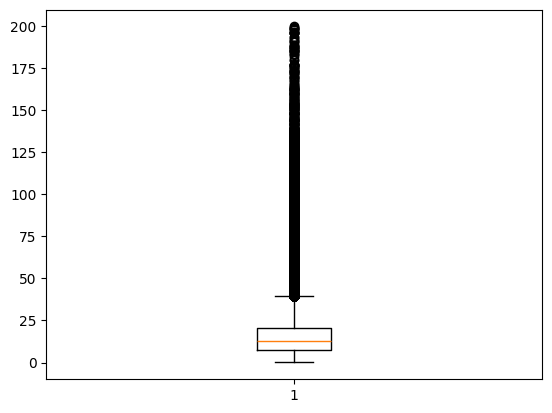

In [129]:
plt.boxplot(valid_df.trip_duration)
plt.show()

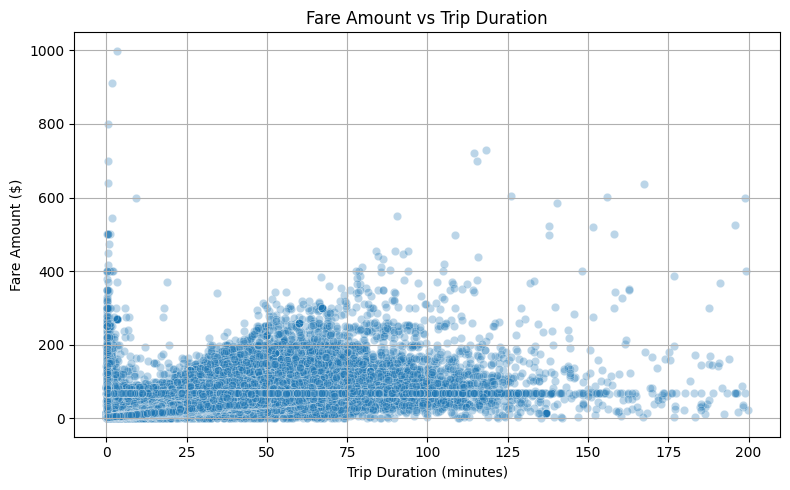

In [130]:
# Show relationship between fare and trip duration

plt.figure(figsize=(8, 5))
sns.scatterplot(data=valid_df, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

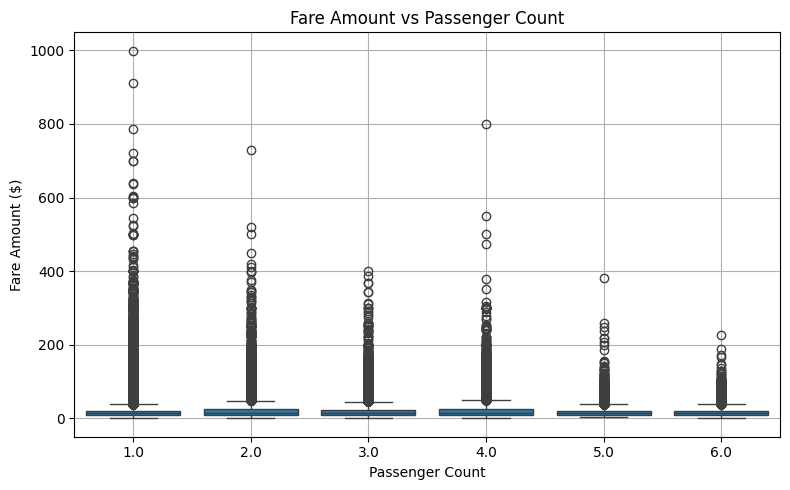

In [131]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8, 5))
sns.boxplot(data=sampleData, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

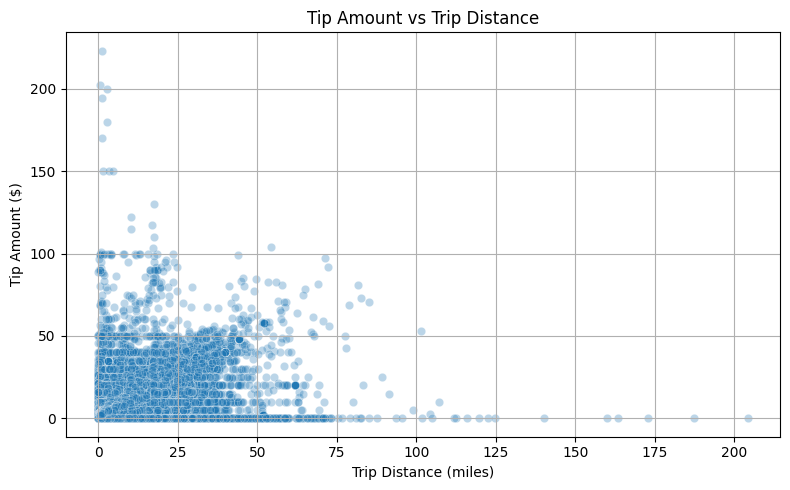

In [132]:
# Show relationship between tip and trip distance
filtered = sampleData[sampleData['trip_distance'] > 0]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [133]:
# Analyse the distribution of different payment types (payment_type).

payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

sampleData['payment_type_label'] = sampleData['payment_type'].map(payment_labels)
payment_counts = sampleData['payment_type_label'].value_counts()
print(payment_counts)


payment_type_label
Credit Card    1579689
Cash            330079
Dispute          14624
No Charge         8676
Name: count, dtype: int64


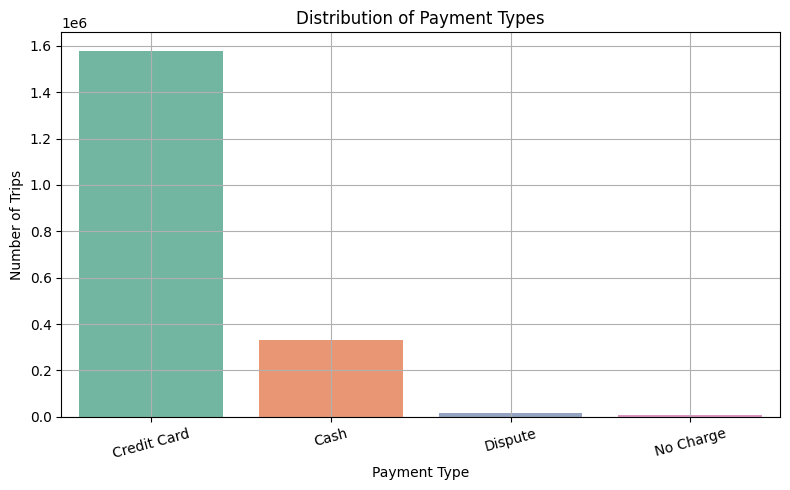

In [134]:
plt.figure(figsize=(8, 5))
sns.countplot(data=sampleData, x='payment_type_label', order=payment_counts.index, palette='Set2')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [135]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [204]:
import geopandas as gpd


# Adjust the path according to your folder structure
shapefile_path = 'C:/Users/ujwal/OneDrive/Desktop/AI & ML/AI/MLC76/lxp content/SQL and Statistics Essentials/5.EDA Assignment/Starter Notebook - EDA NYC Taxi/data/taxi_zones/taxi_zones.shp'

# Read as a GeoDataFrame
zones_gdf = gpd.read_file(shapefile_path)

# Preview the shapefile
zones_gdf.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

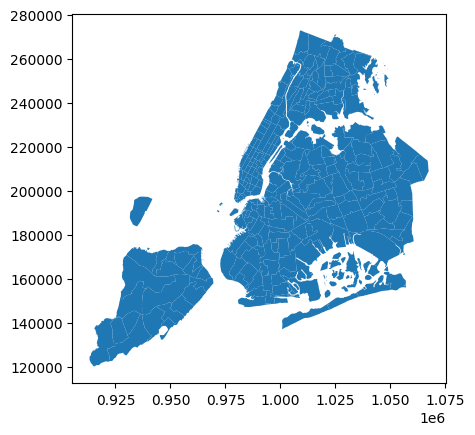

In [137]:
 print(zones_gdf.info())
 zones_gdf.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [206]:
# Merge zones and trip records using locationID and PULocationID

# get pickup zone name
sampleData = sampleData.merge(
    zones_gdf[['LocationID', 'zone']], 
    how='left', 
    left_on='PULocationID', 
    right_on='LocationID'
).rename(columns={'zone': 'pickup_zone'})

#Merge for Dropoff Zones
sampleData = sampleData.merge(
    zones_gdf[['LocationID', 'zone']], 
    how='left', 
    left_on='DOLocationID', 
    right_on='LocationID'
).rename(columns={'zone': 'dropoff_zone'})

# Clean up
sampleData = sampleData.drop(columns=['LocationID'], errors='ignore')
sampleData['pickup_zone'] = sampleData['pickup_zone'].astype("string")
sampleData['dropoff_zone'] = sampleData['dropoff_zone'].astype("string")
sampleData.head()

MergeError: Passing 'suffixes' which cause duplicate columns {'LocationID_x'} is not allowed.

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [140]:
# Group data by location and calculate the number of trips

#To group trip data by location IDs including both pickups and dropoffs to get the total number of trips per location, 

#Count pickups and dropoffs separately
pickup_counts = sampleData.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = sampleData.groupby('DOLocationID').size().reset_index(name='dropoff_count')

#Rename columns for merge clarity
pickup_counts = pickup_counts.rename(columns={'PULocationID': 'LocationID'})
dropoff_counts = dropoff_counts.rename(columns={'DOLocationID': 'LocationID'})

# Merge pickup and dropoff counts
location_counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)
# Calculate total trip count per location
location_counts['total_trips'] = location_counts['pickup_count'] + location_counts['dropoff_count']
#Merge with zone names from zones_gdf
location_counts = location_counts.merge(
    zones_gdf[['LocationID', 'zone']],
    on='LocationID',
    how='left'
)
location_counts = location_counts.sort_values(by='total_trips', ascending=False)
print(location_counts[['LocationID', 'zone', 'pickup_count', 'dropoff_count', 'total_trips']].head(10))


     LocationID                          zone  pickup_count  dropoff_count  \
233         237         Upper East Side South       88609.0        78698.0   
157         161                Midtown Center       89630.0        72652.0   
232         236         Upper East Side North       77898.0        83165.0   
128         132                   JFK Airport      108315.0        21137.0   
226         230     Times Sq/Theatre District       66074.0        58435.0   
158         162                  Midtown East       67604.0        53663.0   
138         142           Lincoln Square East       65447.0        53315.0   
166         170                   Murray Hill       56561.0        57134.0   
182         186  Penn Station/Madison Sq West       67211.0        41237.0   
235         239         Upper West Side South       51561.0        53598.0   

     total_trips  
233     167307.0  
157     162282.0  
232     161063.0  
128     129452.0  
226     124509.0  
158     121267.0  
138     

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [142]:
# Merge trip counts back to the zones GeoDataFrame

zones_gdf = zones_gdf.merge(location_counts, on='LocationID', how='left')

zones_gdf.head()


,OBJECTID,Shape_Leng,Shape_Area,zone_x,LocationID,borough,geometry,pickup_count,dropoff_count,total_trips,zone_y
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",217.0,5296.0,5513.0,Newark Airport
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,3.0,5.0,Jamaica Bay
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",34.0,189.0,223.0,Allerton/Pelham Gardens
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",2067.0,7763.0,9830.0,Alphabet City
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",9.0,55.0,64.0,Arden Heights


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Figure size 1200x1000 with 0 Axes>

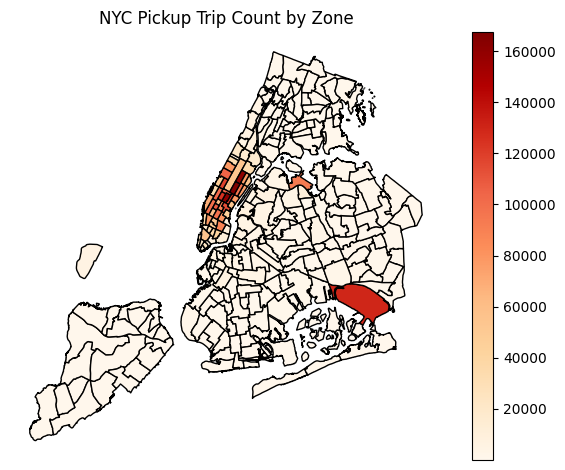

In [145]:
# Define figure and axis

plt.figure(figsize=(12, 10))
zones_gdf.plot(column='total_trips', cmap='OrRd', legend=True, edgecolor='black')
plt.title("NYC Pickup Trip Count by Zone")
plt.axis('off')
plt.tight_layout()
# Plot the map and display it
plt.show()



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [148]:
# Find routes which have the slowest speeds at different times of the day

# Avoid divide-by-zero and invalid durations
sampleData = sampleData[sampleData['trip_duration'] > 0]

# Compute speed in miles per hour
sampleData['avg_speed_mph'] = sampleData['trip_distance'] / (sampleData['trip_duration'] / 60)

# Group by route (PU + DO) and pickup hour
route_hour_speed = sampleData.groupby(
    ['PULocationID', 'DOLocationID', 'pickup_hour']
)['avg_speed_mph'].mean().reset_index()

# Sort to get slowest (lowest average speed) routes
slowest_routes_by_hour = route_hour_speed.sort_values(['pickup_hour', 'avg_speed_mph']).groupby('pickup_hour').head(1)

print(slowest_routes_by_hour)


       PULocationID  DOLocationID  pickup_hour  avg_speed_mph
3602             17            17            0            0.0
0                 1             1            1            0.0
2194             13            13            2            0.0
1342             10            10            3            0.0
2                 1             1            4            0.0
1727             11            11            5            0.0
5285             28            28            6            0.0
15512            61            61            7            0.0
6                 1             1            8            0.0
1306              8             8            9            0.0
8                 1             1           10            0.0
3492             14            14           11            0.0
869               6             6           12            0.0
1750             12            12           13            0.0
3494             14            14           14            0.0
1349    

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [150]:
# Visualise the number of trips per hour and find the busiest hour

# Count number of trips by hour
trips_per_hour = sampleData.groupby('pickup_hour').size().reset_index(name='trip_count')

busiest_hour_row = trips_per_hour.loc[trips_per_hour['trip_count'].idxmax()]
busiest_hour = busiest_hour_row['pickup_hour']
max_trips = busiest_hour_row['trip_count']

print(f" Busiest Hour: {int(busiest_hour)}:00 with {max_trips:,} trips.")

📊 Busiest Hour: 23:00 with 212,453 trips.


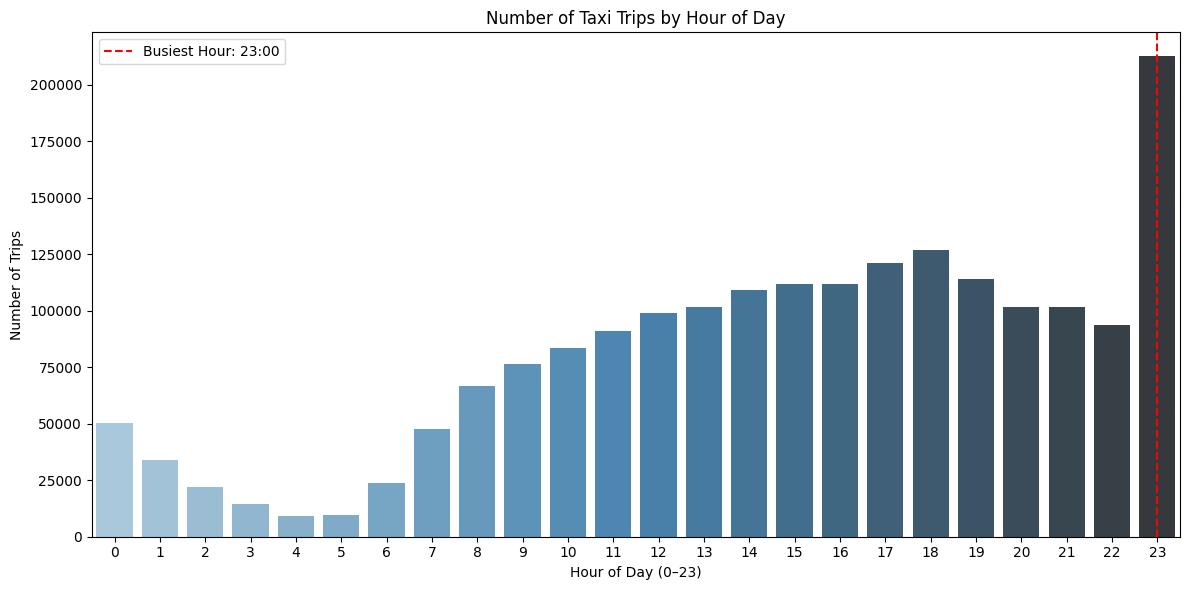

In [151]:
plt.figure(figsize=(12, 6))
sns.barplot(data=trips_per_hour, x='pickup_hour', y='trip_count', palette='Blues_d')

plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {int(busiest_hour)}:00')
plt.title('Number of Taxi Trips by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Trips')
plt.legend()
plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [152]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
# Group by pickup hour
trips_per_hour = sampleData.groupby('pickup_hour').size().reset_index(name='sampled_trip_count')
#Scale up to estimate actual trip counts
trips_per_hour['estimated_total_trips'] = (trips_per_hour['sampled_trip_count'] / sample_fraction).round().astype(int)
#Get the top 5 busiest hours
top_5_busiest = trips_per_hour.sort_values(by='estimated_total_trips', ascending=False).head(5)

print("🚕 Top 5 Busiest Hours (Estimated Actual Trip Counts):")
print(top_5_busiest)

🚕 Top 5 Busiest Hours (Estimated Actual Trip Counts):
    pickup_hour  sampled_trip_count  estimated_total_trips
23           23              212453                4249060
18           18              126710                2534200
17           17              121034                2420680
19           19              113838                2276760
16           16              111838                2236760


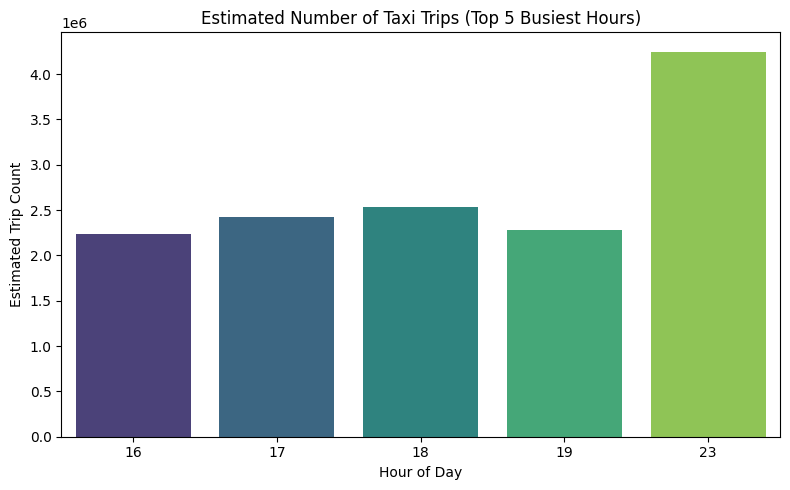

In [153]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top_5_busiest, x='pickup_hour', y='estimated_total_trips', palette='viridis')

plt.title('Estimated Number of Taxi Trips (Top 5 Busiest Hours)')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Trip Count')
plt.tight_layout()
plt.show()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

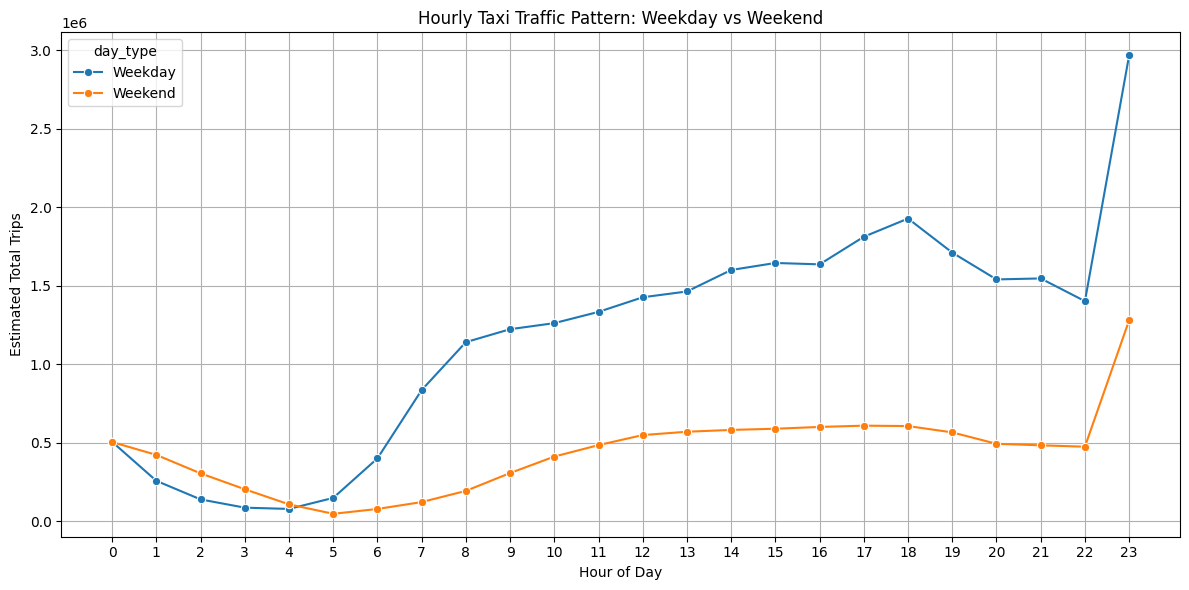

In [156]:
# Compare traffic trends for the week days and weekends

sampleData['pickup_datetime'] = pd.to_datetime(sampleData['tpep_pickup_datetime'])
sampleData['pickup_hour'] = sampleData['pickup_datetime'].dt.hour
sampleData['pickup_dayofweek'] = sampleData['pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
# Tag each row as Weekday or Weekend
sampleData['day_type'] = sampleData['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
# Group by pickup_hour and day_type
hourly_pattern = (
    sampleData.groupby(['pickup_hour', 'day_type'])
    .size()
    .reset_index(name='trip_count')
)
# Scale up trip counts (optional, only if using sampled data)
sample_fraction = 0.05
hourly_pattern['estimated_total_trips'] = (hourly_pattern['trip_count'] / sample_fraction).round().astype(int)
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_pattern, x='pickup_hour', y='estimated_total_trips', hue='day_type', marker='o')

plt.title('Hourly Taxi Traffic Pattern: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Total Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?



**Weekday Traffic Pattern**

* **Morning Peak (7–10 AM):** Significant increase in trip counts likely due to commuters traveling to work.

* **Evening Peak (5–7 PM):** Secondary peak people returning home.

* **Late Night Spike (11 PM–12 AM):** Possibly due to end-of-day shift changes, airport pickups, or nightlife-related rides.

**Weekend Traffic Pattern**
* Lower overall volume throughout the day.
* **Late Night Rise (10 PM–12 AM):** Noticeable spike, suggesting leisure or social outings.
* **Flattened Daytime Curve:** Indicates fewer structured travel times (no work/school), more spread-out trip times.


**Why This Analysis Is Useful**

**For Taxi Fleet Operators:**

* **Optimize Driver Deployment:** Focus more drivers during busy weekday morning/evening peaks and late weekend nights.
* **Reduce Idle Time:** Reassign drivers during quieter periods to more active zones.

**For City Planners / Transportation Authorities:**

* **Infrastructure Planning:** Reinforce transit options or traffic control in high-traffic hours/locations.
* **Improve Public Transport Timings:** Complement taxi demand curves with buses/trains.

**For Business & Marketing**

* **Advertising Time Windows:** Run in-app promos during quiet hours to boost rides.
* **Ride-Pooling Opportunities:** Promote pooling features in peak hours to reduce congestion.



**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

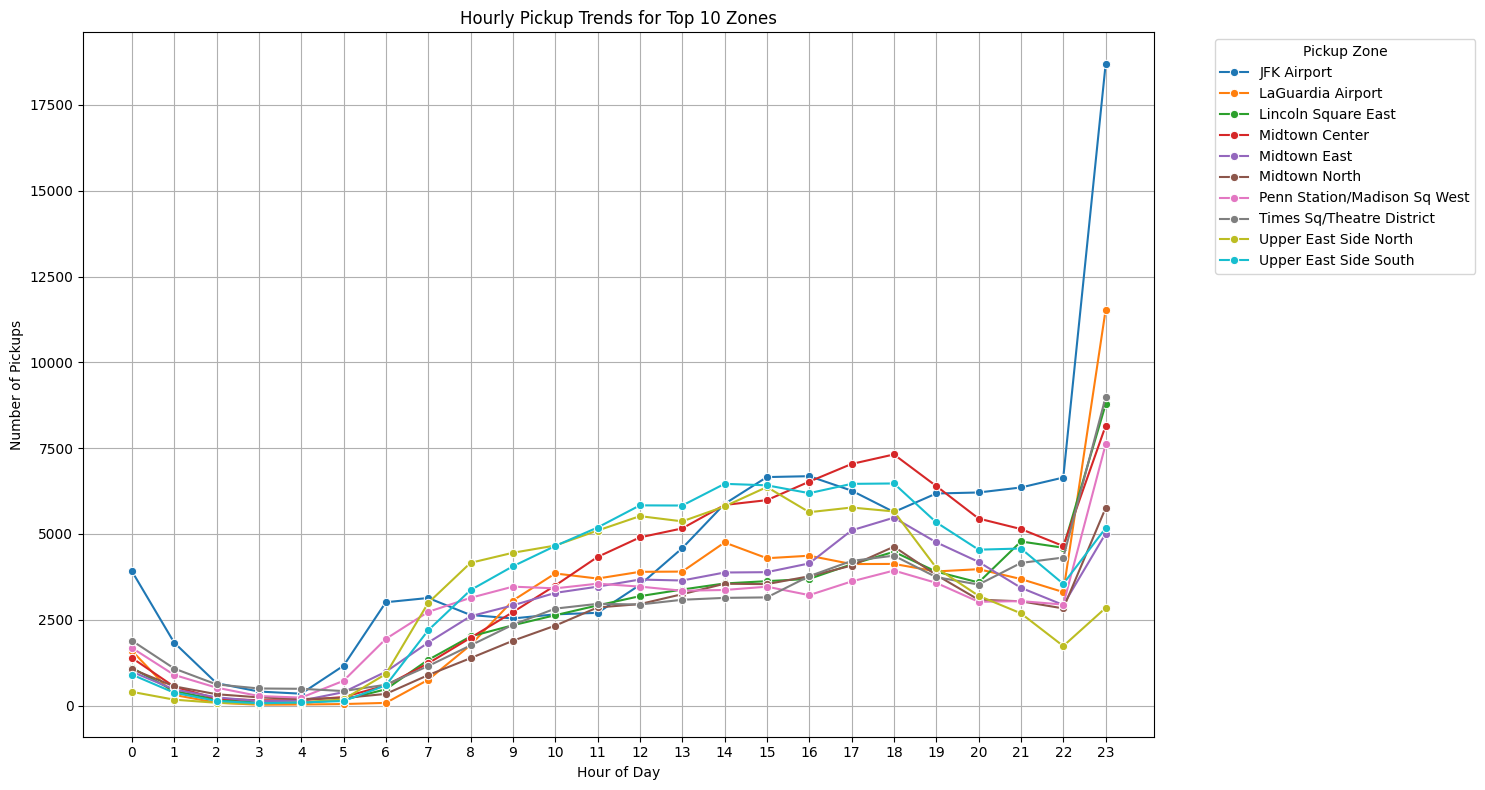

In [158]:
# Find top 10 pickup and dropoff zones

# 1. Calculate hourly pickups
hourly_pickups = (
    sampleData
    .groupby(['pickup_zone', 'pickup_hour'])
    .size()
    .reset_index(name='trip_count')
)

# 2. Total pickups by zone
total_pickups_by_zone = (
    hourly_pickups
    .groupby('pickup_zone')['trip_count']
    .sum()
    .reset_index()
    .sort_values(by='trip_count', ascending=False)
)

# 3. Get top 10 zones
top_10_pickup_zones = total_pickups_by_zone.head(10)['pickup_zone'].tolist()

# Filter hourly data for only top 10 zones
top_hourly_pickups = hourly_pickups[hourly_pickups['pickup_zone'].isin(top_10_pickup_zones)]

plt.figure(figsize=(15, 8))
sns.lineplot(data=top_hourly_pickups, x='pickup_hour', y='trip_count', hue='pickup_zone', marker='o')

plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Pickup Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [161]:
sampleData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1933655 entries, 0 to 1933786
Data columns (total 35 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

['Upper East Side North', 'Upper East Side South', 'Midtown Center', 'Times Sq/Theatre District', 'Murray Hill', 'Midtown East', 'Upper West Side South', 'Lincoln Square East', 'Lenox Hill West', 'East Chelsea']


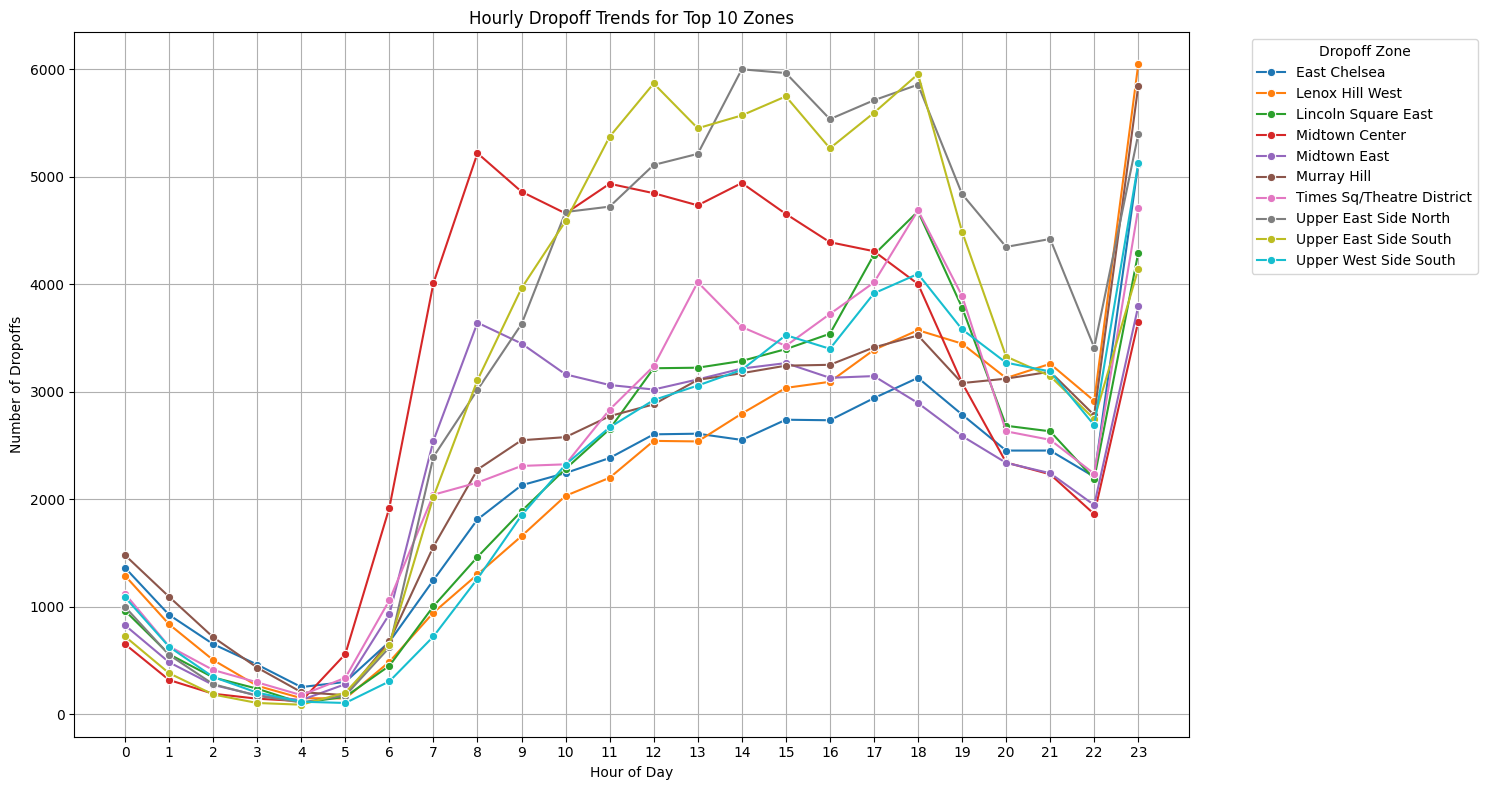

In [162]:
# 1. Calculate hourly dropp
# Group by dropoff zone and pickup hour (trip end time not provided as a separate hour column)
hourly_dropoffs = (
    sampleData
    .groupby(['dropoff_zone', 'pickup_hour'])  # using pickup_hour as proxy for trip timing
    .size()
    .reset_index(name='trip_count')
)
# Calculate total dropoffs by zone
total_dropoffs_by_zone = (
    hourly_dropoffs
    .groupby('dropoff_zone')['trip_count']
    .sum()
    .reset_index()
    .sort_values(by='trip_count', ascending=False)
)
 # Identify top 10 dropoff zones
top_10_dropoff_zones = total_dropoffs_by_zone.head(10)['dropoff_zone'].tolist()
print(top_10_dropoff_zones)

# Filter data for top zones only

top_hourly_dropoffs = hourly_dropoffs[hourly_dropoffs['dropoff_zone'].isin(top_10_dropoff_zones)]

plt.figure(figsize=(15, 8))
sns.lineplot(data=top_hourly_dropoffs, x='pickup_hour', y='trip_count', hue='dropoff_zone', marker='o')

plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Dropoff Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

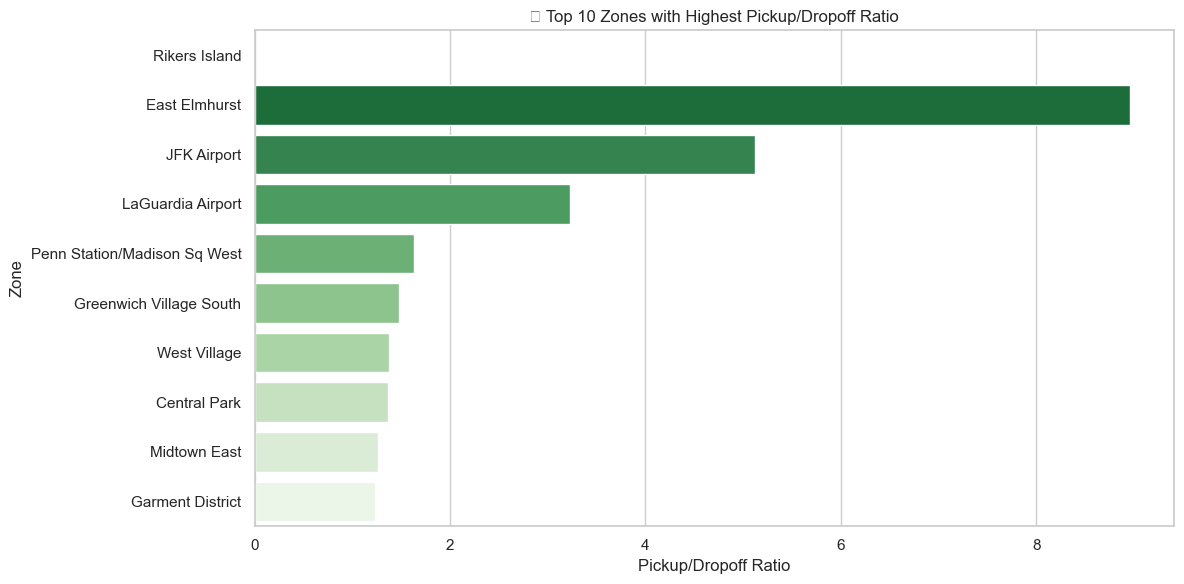

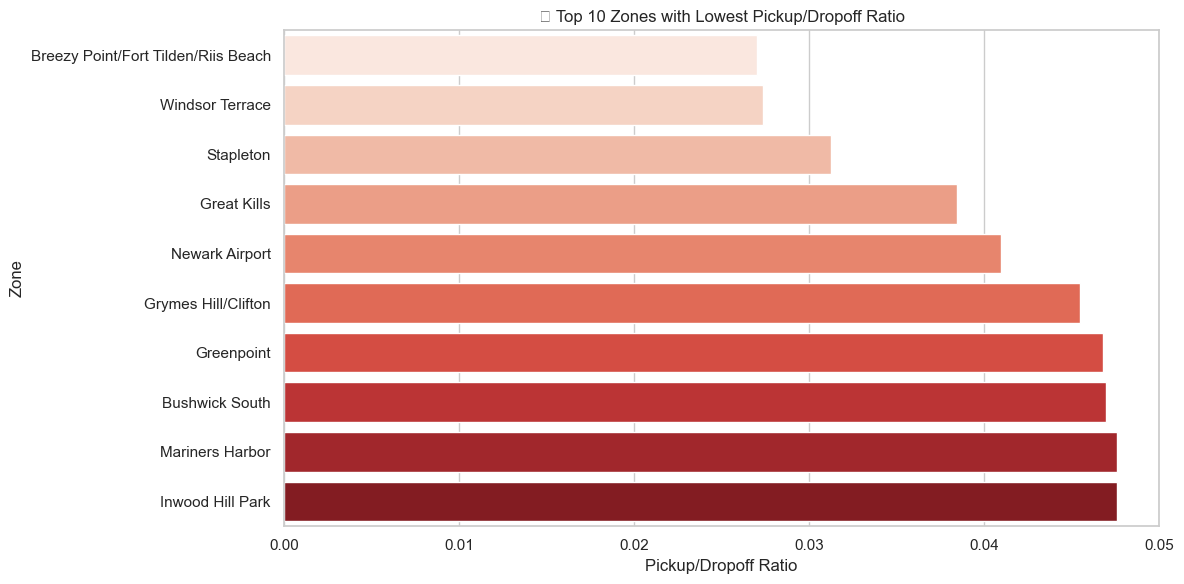

In [165]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Total pickups per zone
pickup_counts = (
    sampleData.groupby('pickup_zone')
    .size()
    .reset_index(name='pickup_count')
)

# Total dropoffs per zone
dropoff_counts = (
    sampleData.groupby('dropoff_zone')
    .size()
    .reset_index(name='dropoff_count')
)

# Merge counts
zone_counts = pd.merge(
    pickup_counts,
    dropoff_counts,
    left_on='pickup_zone',
    right_on='dropoff_zone',
    how='outer'
)

# Fill missing and unify zone naming
zone_counts['pickup_count'] = zone_counts['pickup_count'].fillna(0)
zone_counts['dropoff_count'] = zone_counts['dropoff_count'].fillna(0)
zone_counts['zone'] = zone_counts['pickup_zone'].combine_first(zone_counts['dropoff_zone'])

# Calculate ratio
zone_counts['pickup_drop_ratio'] = zone_counts.apply(
    lambda row: row['pickup_count'] / row['dropoff_count'] if row['dropoff_count'] != 0 else float('inf'),
    axis=1
)

# Extract top and bottom 10 zones
top_10_highest = zone_counts.sort_values(by='pickup_drop_ratio', ascending=False).head(10)
top_10_lowest = zone_counts[zone_counts['pickup_drop_ratio'] > 0].sort_values(by='pickup_drop_ratio').head(10)

#Set plot style
sns.set(style="whitegrid")

# Plot Top 10 Highest Ratios
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_highest, x='pickup_drop_ratio', y='zone', palette='Greens_r')
plt.title('🔝 Top 10 Zones with Highest Pickup/Dropoff Ratio')
plt.xlabel('Pickup/Dropoff Ratio')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()

# Plot Top 10 Lowest Ratios
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_lowest, x='pickup_drop_ratio', y='zone', palette='Reds')
plt.title('🔻 Top 10 Zones with Lowest Pickup/Dropoff Ratio')
plt.xlabel('Pickup/Dropoff Ratio')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

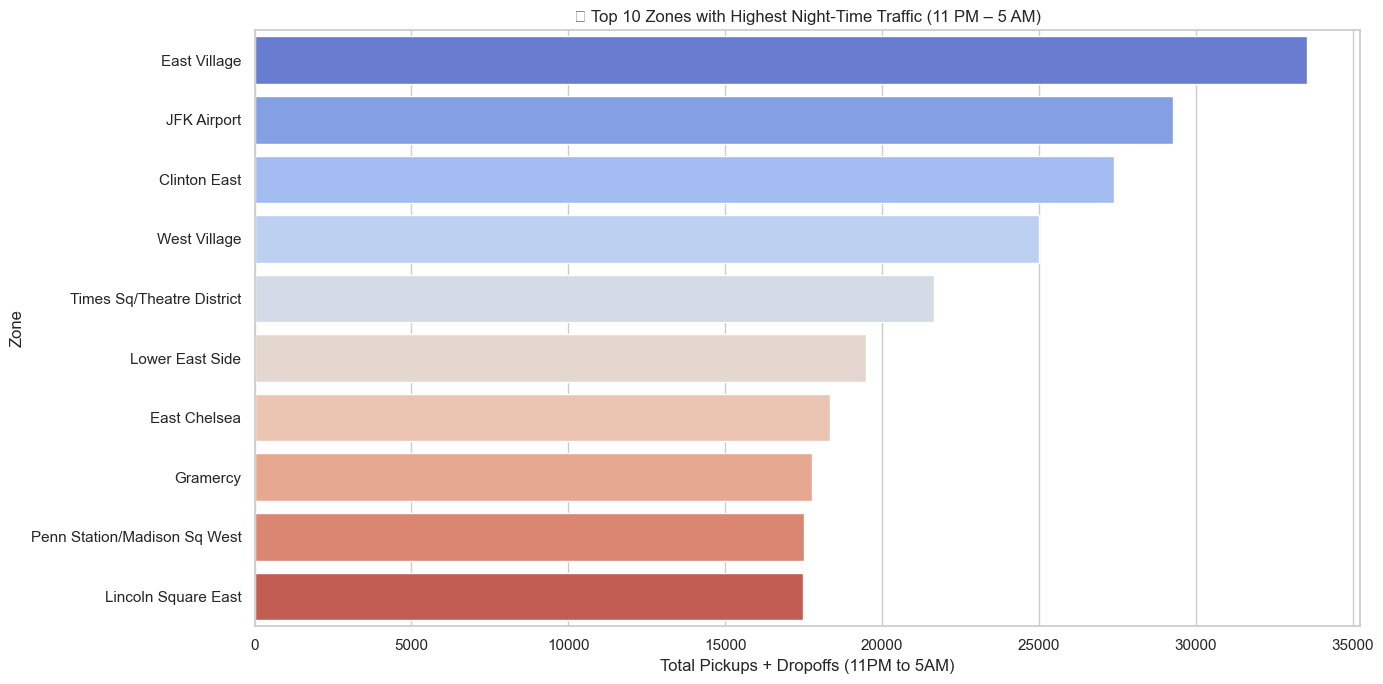

In [166]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter trips between 11 PM (23) and 5 AM (inclusive)
night_data = sampleData[(sampleData['pickup_hour'] >= 23) | (sampleData['pickup_hour'] <= 5)]
# Night pickups by zone
night_pickups = (
    night_data.groupby('pickup_zone')
    .size()
    .reset_index(name='night_pickups')
)

# Night dropoffs by zone
night_dropoffs = (
    night_data.groupby('dropoff_zone')
    .size()
    .reset_index(name='night_dropoffs')
)

night_traffic = pd.merge(
    night_pickups,
    night_dropoffs,
    left_on='pickup_zone',
    right_on='dropoff_zone',
    how='outer'
)

# Combine zone column
night_traffic['zone'] = night_traffic['pickup_zone'].combine_first(night_traffic['dropoff_zone'])

# Fill missing with 0
night_traffic['night_pickups'] = night_traffic['night_pickups'].fillna(0)
night_traffic['night_dropoffs'] = night_traffic['night_dropoffs'].fillna(0)

# Total traffic at night
night_traffic['total_night_traffic'] = night_traffic['night_pickups'] + night_traffic['night_dropoffs']

# Sort by total traffic
night_traffic = night_traffic.sort_values(by='total_night_traffic', ascending=False)
top_night_zones = night_traffic.head(10)



plt.figure(figsize=(14, 7))
sns.barplot(
    data=top_night_zones,
    y='zone',
    x='total_night_traffic',
    palette='coolwarm'
)
plt.title('🌙 Top 10 Zones with Highest Night-Time Traffic (11 PM – 5 AM)')
plt.xlabel('Total Pickups + Dropoffs (11PM to 5AM)')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [167]:
# Filter for night hours (11 PM to 5 AM)

# Night hours: 11PM (23) to 5AM (0-5)
night_data = sampleData[(sampleData['pickup_hour'] >= 23) | (sampleData['pickup_hour'] <= 5)]

# Day hours: 6AM (6) to 10PM (22)
day_data = sampleData[(sampleData['pickup_hour'] >= 6) & (sampleData['pickup_hour'] <= 22)]

#Calculate Total Revenue for Each
night_revenue = night_data['total_amount'].sum()
day_revenue = day_data['total_amount'].sum()

# Combine into DataFrame
revenue_df = pd.DataFrame({
    'Period': ['Night (11PM–5AM)', 'Day (6AM–10PM)'],
    'Revenue': [night_revenue, day_revenue]
})

# Calculate percentages
revenue_df['Share (%)'] = (revenue_df['Revenue'] / revenue_df['Revenue'].sum() * 100).round(2)

print(revenue_df)


             Period      Revenue  Share (%)
0  Night (11PM–5AM)  10684999.02      18.98
1    Day (6AM–10PM)  45596724.48      81.02


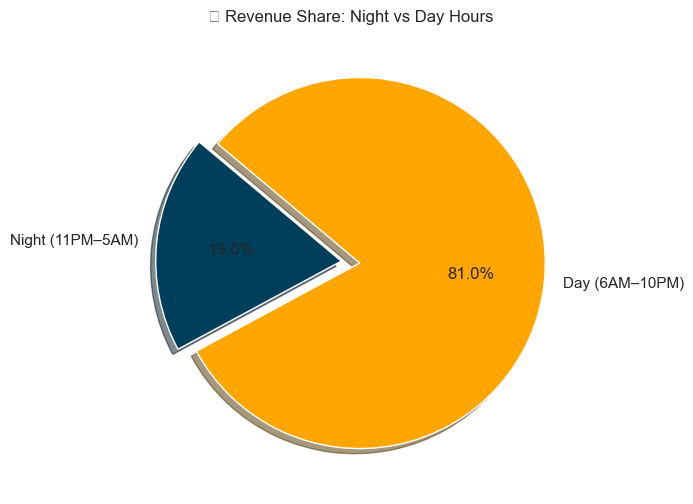

In [168]:
# Pie Chart
plt.figure(figsize=(7, 7))
colors = ['#003f5c', '#ffa600']
plt.pie(
    revenue_df['Revenue'],
    labels=revenue_df['Period'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=(0.05, 0.05),
    shadow=True
)
plt.title('💰 Revenue Share: Night vs Day Hours')
plt.tight_layout()
plt.show()


Analysis:

* Night revenue share helps understand the economic importance of late-night rides.

* Useful for driver shift planning, incentive programs, or dynamic pricing.

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [169]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out invalid values
valid_fares = sampleData[(sampleData['trip_distance'] > 0) & (sampleData['passenger_count'] > 0)]

# Group and aggregate
fare_stats = valid_fares.groupby('passenger_count').agg({
    'fare_amount': 'sum',
    'trip_distance': 'sum'
}).reset_index()

# Compute fare per mile per passenger
fare_stats['fare_per_mile_per_passenger'] = (
    fare_stats['fare_amount'] / (fare_stats['trip_distance'] * fare_stats['passenger_count'])
).round(2)

# Sort by passenger count
fare_stats = fare_stats.sort_values('passenger_count')
print(fare_stats)


   passenger_count  fare_amount  trip_distance  fare_per_mile_per_passenger
0              1.0  28050717.48     4986027.47                         5.63
1              2.0   6585350.93     1233220.55                         2.67
2              3.0   1604227.78      290956.87                         1.84
3              4.0    945629.80      172122.87                         1.37
4              5.0    496590.10       89270.52                         1.11
5              6.0    318354.40       56239.85                         0.94


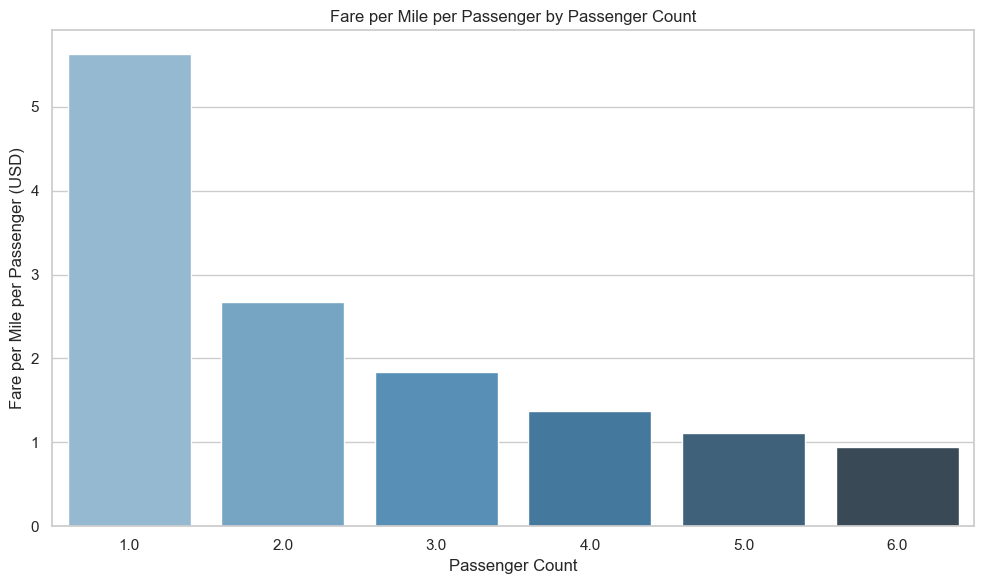

In [170]:
plt.figure(figsize=(10, 6))
sns.barplot(data=fare_stats, x='passenger_count', y='fare_per_mile_per_passenger', palette='Blues_d')
plt.title('Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger (USD)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Analysis:

* If fare per mile per passenger decreases with more passengers, it suggests cost-sharing.

* If it remains the same, fares are likely not influenced by passenger count.

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

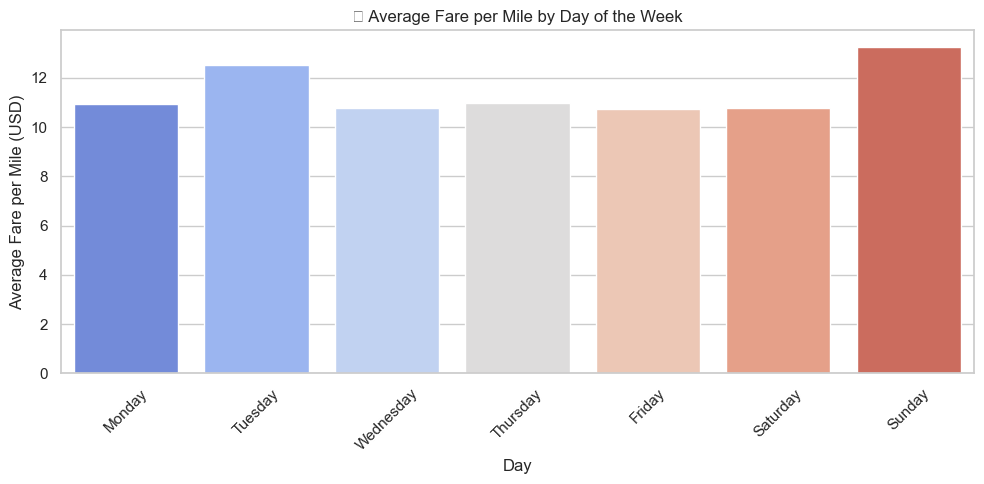

In [171]:
# Compare the average fare per mile for different days and for different times of the day
valid_data = sampleData[sampleData['trip_distance'] > 0].copy()
valid_data['fare_per_mile'] = valid_data['fare_amount'] / valid_data['trip_distance']
# Add day of the week
valid_data['pickup_day'] = pd.to_datetime(valid_data['pickup_date']).dt.day_name()

# Group by day and calculate average fare/mile
fare_by_day = valid_data.groupby('pickup_day')['fare_per_mile'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

# Plot


plt.figure(figsize=(10, 5))
sns.barplot(data=fare_by_day, x='pickup_day', y='fare_per_mile', palette='coolwarm')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



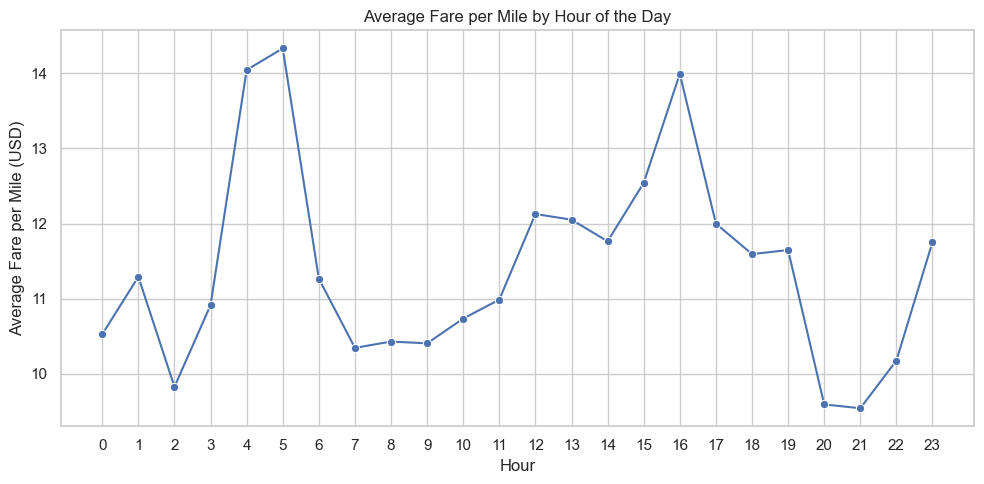

In [172]:
# Group by pickup hour
fare_by_hour = valid_data.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=fare_by_hour, x='pickup_hour', y='fare_per_mile', marker='o')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


Infrence: 

* Higher fare/mile on weekends: fewer short trips, more leisure rides.
* Peak hours costlier: surge pricing or traffic impact.
* Late-night spikes:  airport/club fares.

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

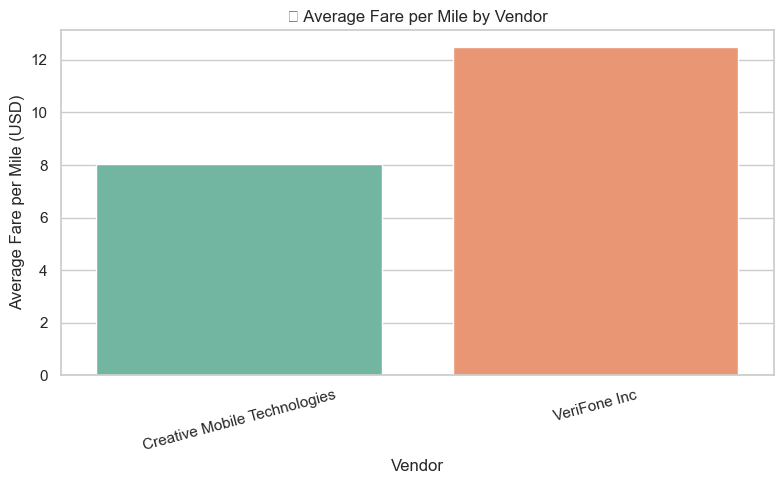

In [174]:
# Compare fare per mile for different vendors
# Filter valid data and calculate fare per mile
# Only consider rows with valid trip distance
vendor_fare_data = sampleData[sampleData['trip_distance'] > 0].copy()

# Calculate fare per mile
vendor_fare_data['fare_per_mile'] = vendor_fare_data['fare_amount'] / vendor_fare_data['trip_distance']
# Map vendor names
vendor_fare_data['VendorID'] = vendor_fare_data['VendorID'].map({
    1: 'Creative Mobile Technologies',
    2: 'VeriFone Inc'
})
# Group by VendorID and calculate average fare per mile
fare_by_vendor = vendor_fare_data.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=fare_by_vendor, x='VendorID', y='fare_per_mile', palette='Set2')
plt.title('🚕 Average Fare per Mile by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Analysis Compare cost-efficiency between vendors. 

If one vendor consistently charges more per mile, it may indicate:

* Different base fare structures

* Operational zones (e.g., airport-heavy)

* Pricing strategies

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [175]:
# Defining distance tiers
    # Short Trips: ≤ 2 miles
    # Medium Trips: > 2 and ≤ 5 miles
    # Long Trips: > 5 miles

# Filter out invalid trip distances
tiered_data = sampleData[(sampleData['trip_distance'] > 0) & (sampleData['fare_amount'] > 0)].copy()

# Calculate fare per mile
tiered_data['fare_per_mile'] = tiered_data['fare_amount'] / tiered_data['trip_distance']

# Map vendor names
tiered_data['Vendor'] = tiered_data['VendorID'].map({
    1: 'Creative Mobile Technologies',
    2: 'VeriFone Inc'
})

# Create distance tier column
def categorize_trip(distance):
    if distance <= 2:
        return 'Short (≤2 miles)'
    elif 2 < distance <= 5:
        return 'Medium (2–5 miles)'
    else:
        return 'Long (>5 miles)'

tiered_data['Distance Tier'] = tiered_data['trip_distance'].apply(categorize_trip)
# Group by vendor and tier
fare_tier_summary = (
    tiered_data.groupby(['Vendor', 'Distance Tier'])['fare_per_mile']
    .mean()
    .reset_index()
    .round(2)
)

print(fare_tier_summary)

                         Vendor       Distance Tier  fare_per_mile
0  Creative Mobile Technologies     Long (>5 miles)           4.41
1  Creative Mobile Technologies  Medium (2–5 miles)           6.32
2  Creative Mobile Technologies    Short (≤2 miles)           9.89
3                  VeriFone Inc     Long (>5 miles)           4.49
4                  VeriFone Inc  Medium (2–5 miles)           6.49
5                  VeriFone Inc    Short (≤2 miles)          18.36


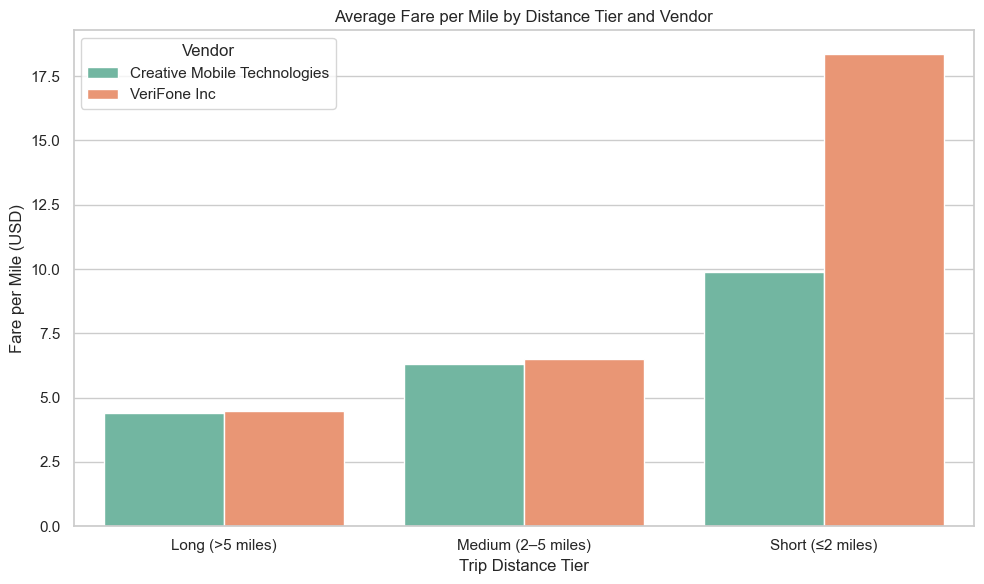

In [177]:
plt.figure(figsize=(10, 6))
sns.barplot(data=fare_tier_summary, x='Distance Tier', y='fare_per_mile', hue='Vendor', palette='Set2')
plt.title('Average Fare per Mile by Distance Tier and Vendor')
plt.ylabel('Fare per Mile (USD)')
plt.xlabel('Trip Distance Tier')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Analysis:

* Understand if short trips are disproportionately expensive.

* Detect price efficiency for longer trips per vendor.

* Identify vendor pricing strategy differences (e.g., higher base fare for shorter trips).

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

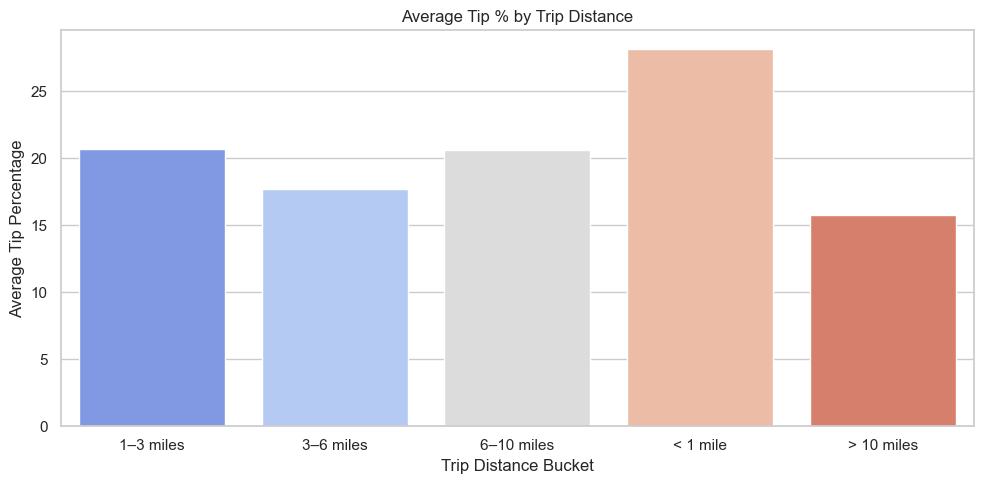

In [180]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Filter valid fare and tip data

tip_data = sampleData[(sampleData['fare_amount'] > 0) & (sampleData['tip_amount'] >= 0)].copy()

# Calculate tip percentage
tip_data['tip_percent'] = (tip_data['tip_amount'] / tip_data['fare_amount']) * 100

def distance_bucket(d):
    if d <= 1:
        return '< 1 mile'
    elif d <= 3:
        return '1–3 miles'
    elif d <= 6:
        return '3–6 miles'
    elif d <= 10:
        return '6–10 miles'
    else:
        return '> 10 miles'

tip_data['distance_bucket'] = tip_data['trip_distance'].apply(distance_bucket)

# Group and calculate average tip %
tip_by_distance = tip_data.groupby('distance_bucket')['tip_percent'].mean().reset_index().round(2)

plt.figure(figsize=(10,5))
sns.barplot(data=tip_by_distance, x='distance_bucket', y='tip_percent', palette='coolwarm')
plt.title('Average Tip % by Trip Distance')
plt.xlabel('Trip Distance Bucket')
plt.ylabel('Average Tip Percentage')
plt.tight_layout()
plt.show()

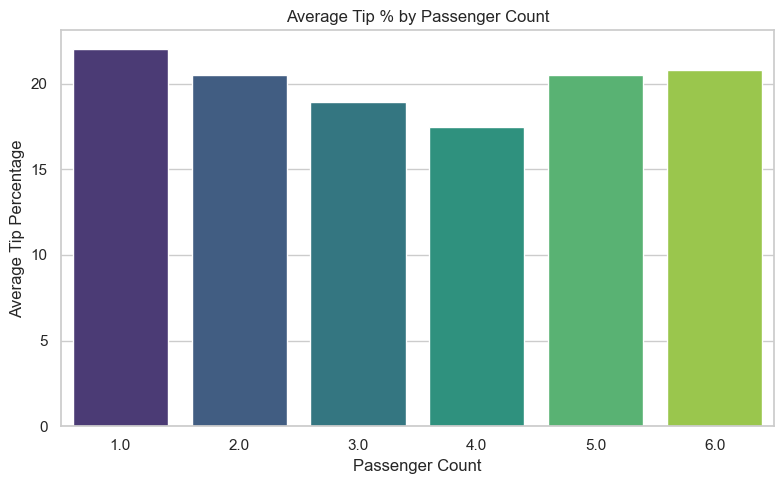

In [181]:
tip_by_passenger = tip_data.groupby('passenger_count')['tip_percent'].mean().reset_index().round(2)

plt.figure(figsize=(8,5))
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percent', palette='viridis')
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.tight_layout()
plt.show()


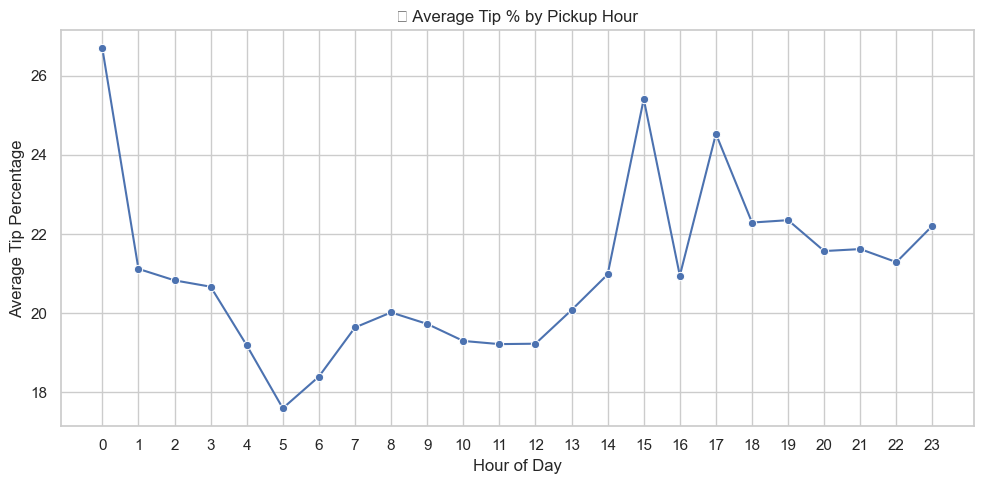

In [182]:
tip_by_hour = tip_data.groupby('pickup_hour')['tip_percent'].mean().reset_index().round(2)

plt.figure(figsize=(10,5))
sns.lineplot(data=tip_by_hour, x='pickup_hour', y='tip_percent', marker='o')
plt.title('🕒 Average Tip % by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [183]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Use only valid fare and tip values
tip_data = sampleData[(sampleData['fare_amount'] > 0) & (sampleData['tip_amount'] >= 0)].copy()

# Calculate tip percentage
tip_data['tip_percent'] = (tip_data['tip_amount'] / tip_data['fare_amount']) * 100

low_tip_df = tip_data[tip_data['tip_percent'] < 10]
high_tip_df = tip_data[tip_data['tip_percent'] > 25]

summary = pd.DataFrame({
    'Feature': ['trip_distance', 'fare_amount', 'passenger_count', 'trip_duration'],
    'Low Tip (<10%) Mean': [
        low_tip_df['trip_distance'].mean(),
        low_tip_df['fare_amount'].mean(),
        low_tip_df['passenger_count'].mean(),
        low_tip_df['trip_duration'].mean()
    ],
    'High Tip (>25%) Mean': [
        high_tip_df['trip_distance'].mean(),
        high_tip_df['fare_amount'].mean(),
        high_tip_df['passenger_count'].mean(),
        high_tip_df['trip_duration'].mean()
    ]
}).round(2)

print(summary)


           Feature  Low Tip (<10%) Mean  High Tip (>25%) Mean
0    trip_distance                 3.92                  2.33
1      fare_amount                21.91                 14.49
2  passenger_count                 1.44                  1.37
3    trip_duration                19.78                 12.64


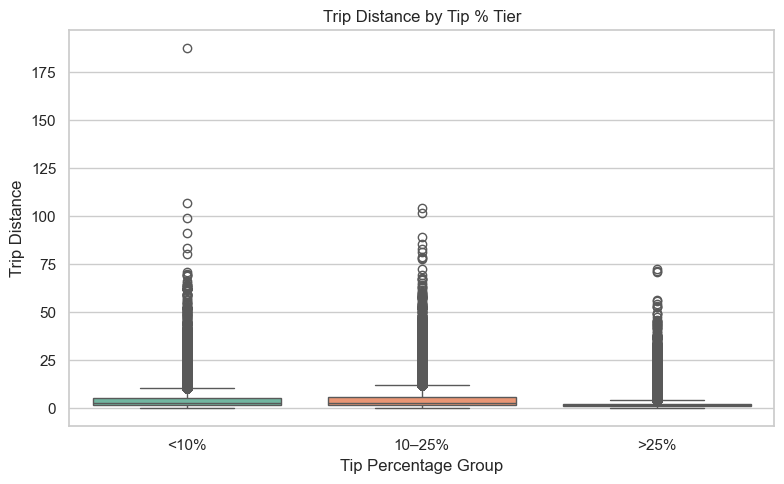

In [185]:
# Boxplot for trip distance
plt.figure(figsize=(8, 5))
sns.boxplot(data=tip_data[tip_data['tip_percent'].between(0, 100)],
            x=pd.cut(tip_data['tip_percent'], bins=[0, 10, 25, 100], labels=['<10%', '10–25%', '>25%']),
            y='trip_distance',
            palette='Set2')
plt.title('Trip Distance by Tip % Tier')
plt.xlabel('Tip Percentage Group')
plt.ylabel('Trip Distance')
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

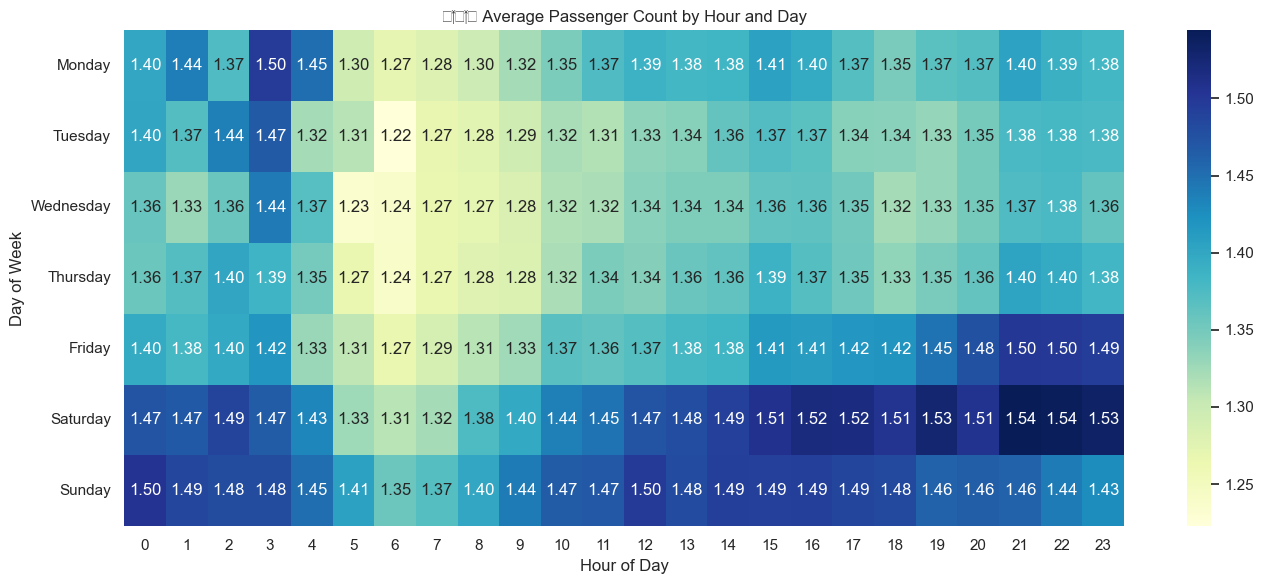

In [186]:
# See how passenger count varies across hours and days

# Ensure datetime is in correct format
sampleData['tpep_pickup_datetime'] = pd.to_datetime(sampleData['tpep_pickup_datetime'])

# Extract hour and weekday
sampleData['pickup_hour'] = sampleData['tpep_pickup_datetime'].dt.hour
sampleData['pickup_day'] = sampleData['tpep_pickup_datetime'].dt.day_name()

# Create a pivot table
passenger_heatmap = sampleData.pivot_table(
    index='pickup_day',
    columns='pickup_hour',
    values='passenger_count',
    aggfunc='mean'
)

# Sort days in calendar order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_heatmap = passenger_heatmap.reindex(day_order)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(passenger_heatmap, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('🧑‍🤝‍🧑 Average Passenger Count by Hour and Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

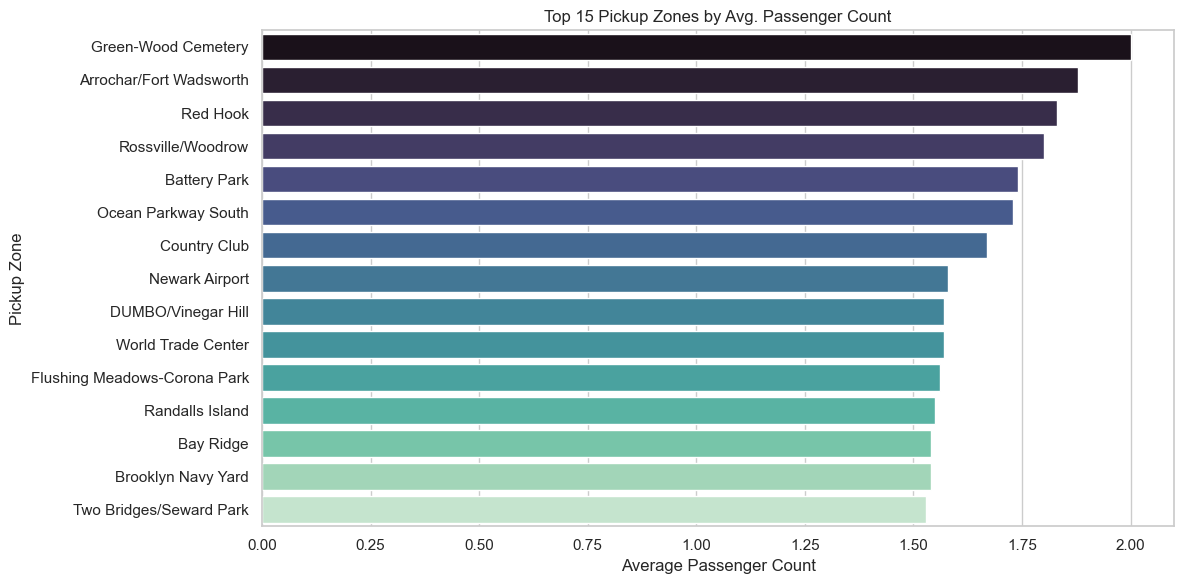

In [188]:
# How does passenger count vary across zones
# Group by pickup zone and compute average passenger count
avg_passenger_by_zone = (
    sampleData.groupby('pickup_zone')['passenger_count']
    .mean()
    .reset_index()
    .sort_values(by='passenger_count', ascending=False)
    .round(2)
)

#print(avg_passenger_by_zone.head(10))  # Top 10 zones

# Select top 15
top_zones = avg_passenger_by_zone.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_zones, x='passenger_count', y='pickup_zone', palette='mako')
plt.title('Top 15 Pickup Zones by Avg. Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [195]:
# How often is each surcharge applied?

surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']
surcharge_applied = {}

total_trips = len(sampleData)

for col in surcharge_cols:
    count = (sampleData[col] > 0).sum()
    percentage = (count / total_trips) * 100
    surcharge_applied[col] = {
        'Trips Applied': count,
        'Percent Applied': round(percentage, 2)
    }

import pandas as pd

surcharge_df = pd.DataFrame(surcharge_applied).T
surcharge_df = surcharge_df.sort_values(by='Percent Applied', ascending=False)
surcharge_df


,Trips Applied,Percent Applied
improvement_surcharge,1933261.0,99.98
mta_tax,1916245.0,99.10
congestion_surcharge,1783284.0,92.22
extra,1235656.0,63.90
airport_fee,179326.0,9.27


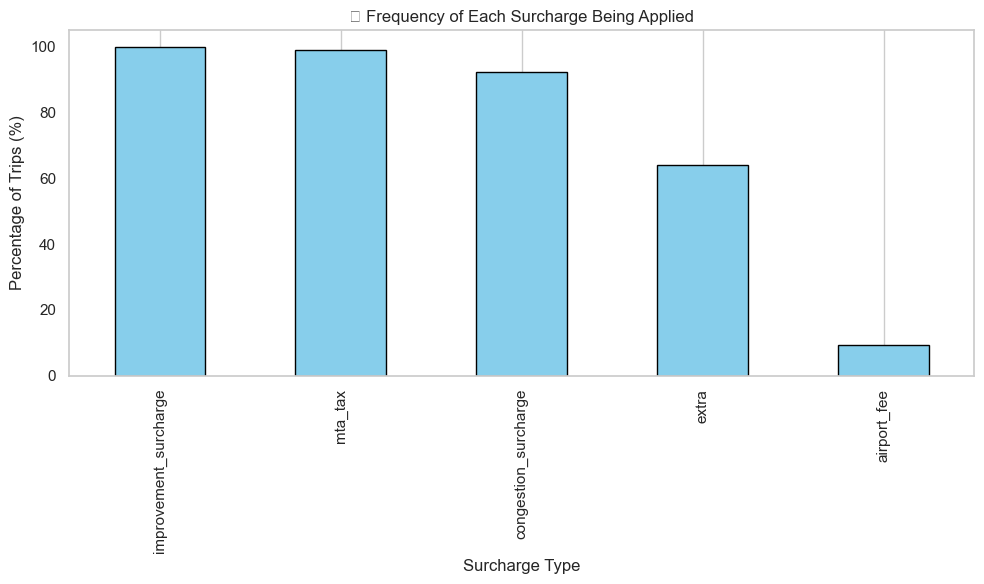

In [196]:
plt.figure(figsize=(10, 6))
surcharge_df['Percent Applied'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('📊 Frequency of Each Surcharge Being Applied')
plt.ylabel('Percentage of Trips (%)')
plt.xlabel('Surcharge Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

mta_tax and improvement_surcharge are usually applied to all metered trips.

congestion_surcharge might apply only to trips in congested Manhattan areas or during specific times.

extra may apply during rush hour or overnight.

airport_fee applies only at JFK and LaGuardia.

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Zone Clustering: Cluster high-volume pickup zones and assign dedicated drivers or fleets to patrol these clusters.

2. Trip Duration Monitoring: Use average trip duration and speed per route-hour to avoid delays and congestion-prone dispatching.

3. Dynamic Fare Strategies: Identify low fare-per-mile routes and apply minimum fare enforcement or combine with multi-stop dispatching.

4. Smart Allocation: Prioritize dispatching based on:

    High tipping zones.

    Repeat demand during specific time slots (using historical data).

5 Shared Ride Optimization:

    Use high passenger-count zones to suggest pooled rides.

    Encourage shared rides during airport peak hours.

6. Idle Time Reduction:

    Reposition vehicles to adjacent zones where demand is predicted to spike within 15–30 minutes (based on pickup trends).

7. Alert System:

    Flag trips with unusually low fare per mile or duration >1 hour for inspection or dynamic rerouting.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

#### Segment Zones Based on Peak Demand Windows:-

Commercial Zones: Weekdays, 7–10 AM & 4–8 PM due to Office commute patterns (e.g., Midtown, Downtown)

Airport Zones:	All days, 6 AM–10 AM & 6 PM–12 AM due to	Regular flights, business & tourist travel

Nightlife/Hotels:	Weekends & Fridays, 9 PM–2 AM	due to Bars, restaurants, clubs (Chelsea, East Village, Soho)

Tourist Hotspots:	Weekends and holidays, 10 AM–6 PM	due to Statue of Liberty, Central Park, Times Square

Residential Zones:	Weekdays, 6–9 AM & 6–9 PM	due to To cater to home-to-office and return trips



##### Weather Forecasting: Position more cabs near transit hubs, shopping malls, and residential areas during rain or snow.

#### Event Calendar Integration: For zones near stadiums, parks, concert halls, dynamically increase fleet during events.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

From this data  analysis following is the current status :

Current: 
Short trips (< 2 miles): High base fare impact → high fare per mile

Medium trips (2–5 miles): Most frequent → optimize this band for volume

Long trips (> 5 miles): Lower fare per mile → risk of underpricing

Adjustment Strategy:

0–2 miles: 	Slight increase in base fare, reduce per-mile rate slightly to remain competitive

2–5 miles	Keep fare per mile slightly above average vendor fare

>5 miles	Introduce a minimum fare floor or a long-trip surcharge to ensure profitability

Time-of-Day Dynamic Surcharges
From trip trends:

Rush hours and late nights see peak demand

These hours offer willingness to pay higher

Dynamic Pricing Proposal:

Time Slot & Adjustment:
7–10 AM & 5–8 PM	- Add peak hour surcharge (₹5–10)
11 PM–3 AM (Fri/Sat)	- Add nightlife demand surcharge
2–6 AM	- Consider incentive-based fare cuts to boost usage

Zone-Based Pricing Differentiation
From  zone analysis:

Airport zones have higher demand but fixed fees.

Tourist zones (Times Square, Central Park) can bear higher rates.

Proposal:

Zone Type—Pricing Recommendation

Airport pickups - 	Enforce fixed base + dynamic zone surcharge during rush

Tourist zones	- Slightly higher base fare with transparent reasoning

Low-demand zones	- Offer off-peak discounts to increase usage

